# Model Viz
## In the following notebook, I want to see how the filters and CNN Activations behave for the best ResNet model I achieved.

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras import models, layers
import tqdm
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

import os

## Model loading

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Load best model

In [4]:
from keras.models import load_model

# Specify the path to the h5 model file
model_path = '/content/drive/MyDrive/ML Project/data/best_resnet_hptuning_02.h5'

# Load the model
model = load_model(model_path)

## Visualize conv layers filters

In [13]:
# summarize filter shapes
conv_indices = []
for i, layer in enumerate(model.layers):
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    weights = layer.get_weights()
    if len(weights) == 2:  # filters and biases
        filters, biases = weights
        print(f'Index: {i}, Layer name: {layer.name}, Filter shape: {filters.shape}')
        conv_indices.append(i)

print("Convolutional layer indices:", conv_indices)

Index: 1, Layer name: conv2d, Filter shape: (7, 7, 1, 64)
Index: 3, Layer name: conv2d_1, Filter shape: (3, 3, 64, 192)
Index: 6, Layer name: conv2d_2, Filter shape: (3, 3, 192, 192)
Index: 7, Layer name: conv2d_3, Filter shape: (1, 1, 64, 192)
Index: 12, Layer name: conv2d_4, Filter shape: (3, 3, 192, 96)
Index: 15, Layer name: conv2d_5, Filter shape: (3, 3, 96, 96)
Index: 16, Layer name: conv2d_6, Filter shape: (1, 1, 192, 96)
Index: 21, Layer name: conv2d_7, Filter shape: (3, 3, 96, 128)
Index: 24, Layer name: conv2d_8, Filter shape: (3, 3, 128, 128)
Index: 25, Layer name: conv2d_9, Filter shape: (1, 1, 96, 128)
Index: 30, Layer name: conv2d_10, Filter shape: (3, 3, 128, 192)
Index: 33, Layer name: conv2d_11, Filter shape: (3, 3, 192, 192)
Index: 34, Layer name: conv2d_12, Filter shape: (1, 1, 128, 192)
Index: 39, Layer name: conv2d_13, Filter shape: (3, 3, 192, 192)
Index: 42, Layer name: conv2d_14, Filter shape: (3, 3, 192, 192)
Convolutional layer indices: [1, 3, 6, 7, 12, 15, 16

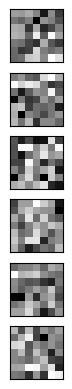

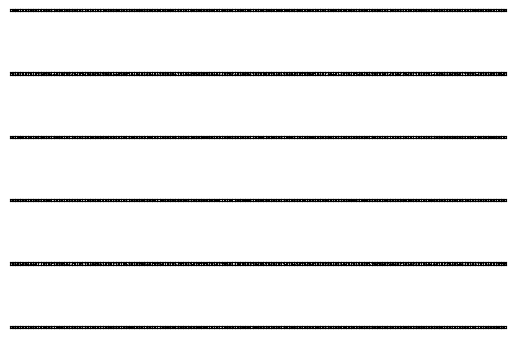

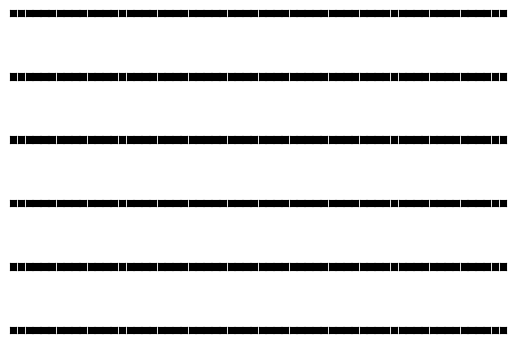

In [15]:
import matplotlib.pyplot as plt

# retrieve weights from selected hidden layers
for layer_index in [1, 6, 7]:
    layer = model.layers[layer_index]
    # Check if the layer is a convolutional layer
    if 'conv' in layer.name:
        # In a Conv layer, we can access the filters and biases with get_weights()
        weights = layer.get_weights()
        if len(weights) == 2:  # Confirm that there are filters and biases to unpack
            filters, biases = weights
            # normalize filter values to 0-1 so we can visualize them
            f_min, f_max = filters.min(), filters.max()
            filters = (filters - f_min) / (f_max - f_min)
            # plot first 6 filters, each row is a filter and the number of columns represent the channels
            n_filters, ix = 6, 1
            n_channels = filters.shape[2]  # get number of channels
            for i in range(n_filters):
                # get the filter
                f = filters[:, :, :, i]
                # plot each channel separately
                for j in range(n_channels):
                    # specify subplot and turn of axis
                    ax = plt.subplot(n_filters, n_channels, ix)
                    ax.set_xticks([])
                    ax.set_yticks([])
                    # plot filter channel in grayscale
                    plt.imshow(f[:, :, j], cmap='gray')
                    ix += 1
            # show the figure
            plt.show()
        else:
            print(f"Layer {layer.name} does not have filters and biases to unpack.")
    else:
        print(f"Layer {layer.name} is not a convolutional layer.")

### Loading and visualizing filters applied to a specific image

In [16]:
import numpy as np

def read_arrays_from_drive(folder_path, imgs_filename, lbls_filename):
    """
    Reads the imgs and lbls arrays from a Google Drive folder.

    Args:
        folder_path (str): The path to the folder in Google Drive.
        imgs_filename (str): The filename for the imgs array.
        lbls_filename (str): The filename for the lbls array.

    Returns:
        tuple: A tuple containing the imgs and lbls arrays.
    """
    # Load the .npy files from the specified folder in Google Drive
    imgs = np.load(f"{folder_path}/{imgs_filename}")
    lbls = np.load(f"{folder_path}/{lbls_filename}")

    return imgs, lbls

In [17]:
folder_path = "/content/drive/MyDrive/ML Project/data"
train_imgs_filename = "train_imgs.npy"
train_lbls_filename = "train_lbls.npy"
test_imgs_filename = "test_imgs.npy"
test_lbls_filename = "test_lbls.npy"
val_imgs_filename = "val_imgs.npy"
val_lbls_filename = "val_lbls.npy"

train_imgs, train_lbls = read_arrays_from_drive(folder_path, train_imgs_filename, train_lbls_filename)
test_imgs, test_lbls = read_arrays_from_drive(folder_path, test_imgs_filename, test_lbls_filename)
val_imgs, val_lbls = read_arrays_from_drive(folder_path, val_imgs_filename, val_lbls_filename)

Check the shape to see if sets were imported correctly

In [18]:
print(f'Shape of training data: {np.shape(train_imgs)}')
print(f'Shape of testing data: {np.shape(test_imgs)}')
print(f'Shape of validation data: {np.shape(val_imgs)}')

Shape of training data: (28709, 48, 48, 1)
Shape of testing data: (3589, 48, 48, 1)
Shape of validation data: (3589, 48, 48, 1)


Now, let's visualize how the conv filters are applied to a specific image

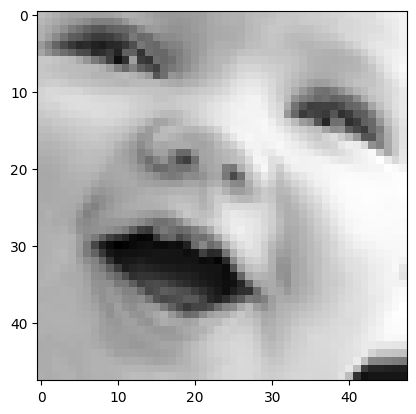

In [26]:
pyplot.imshow(test_imgs[10], cmap='gray')

2/2 [==============================] - 2s 91ms/step


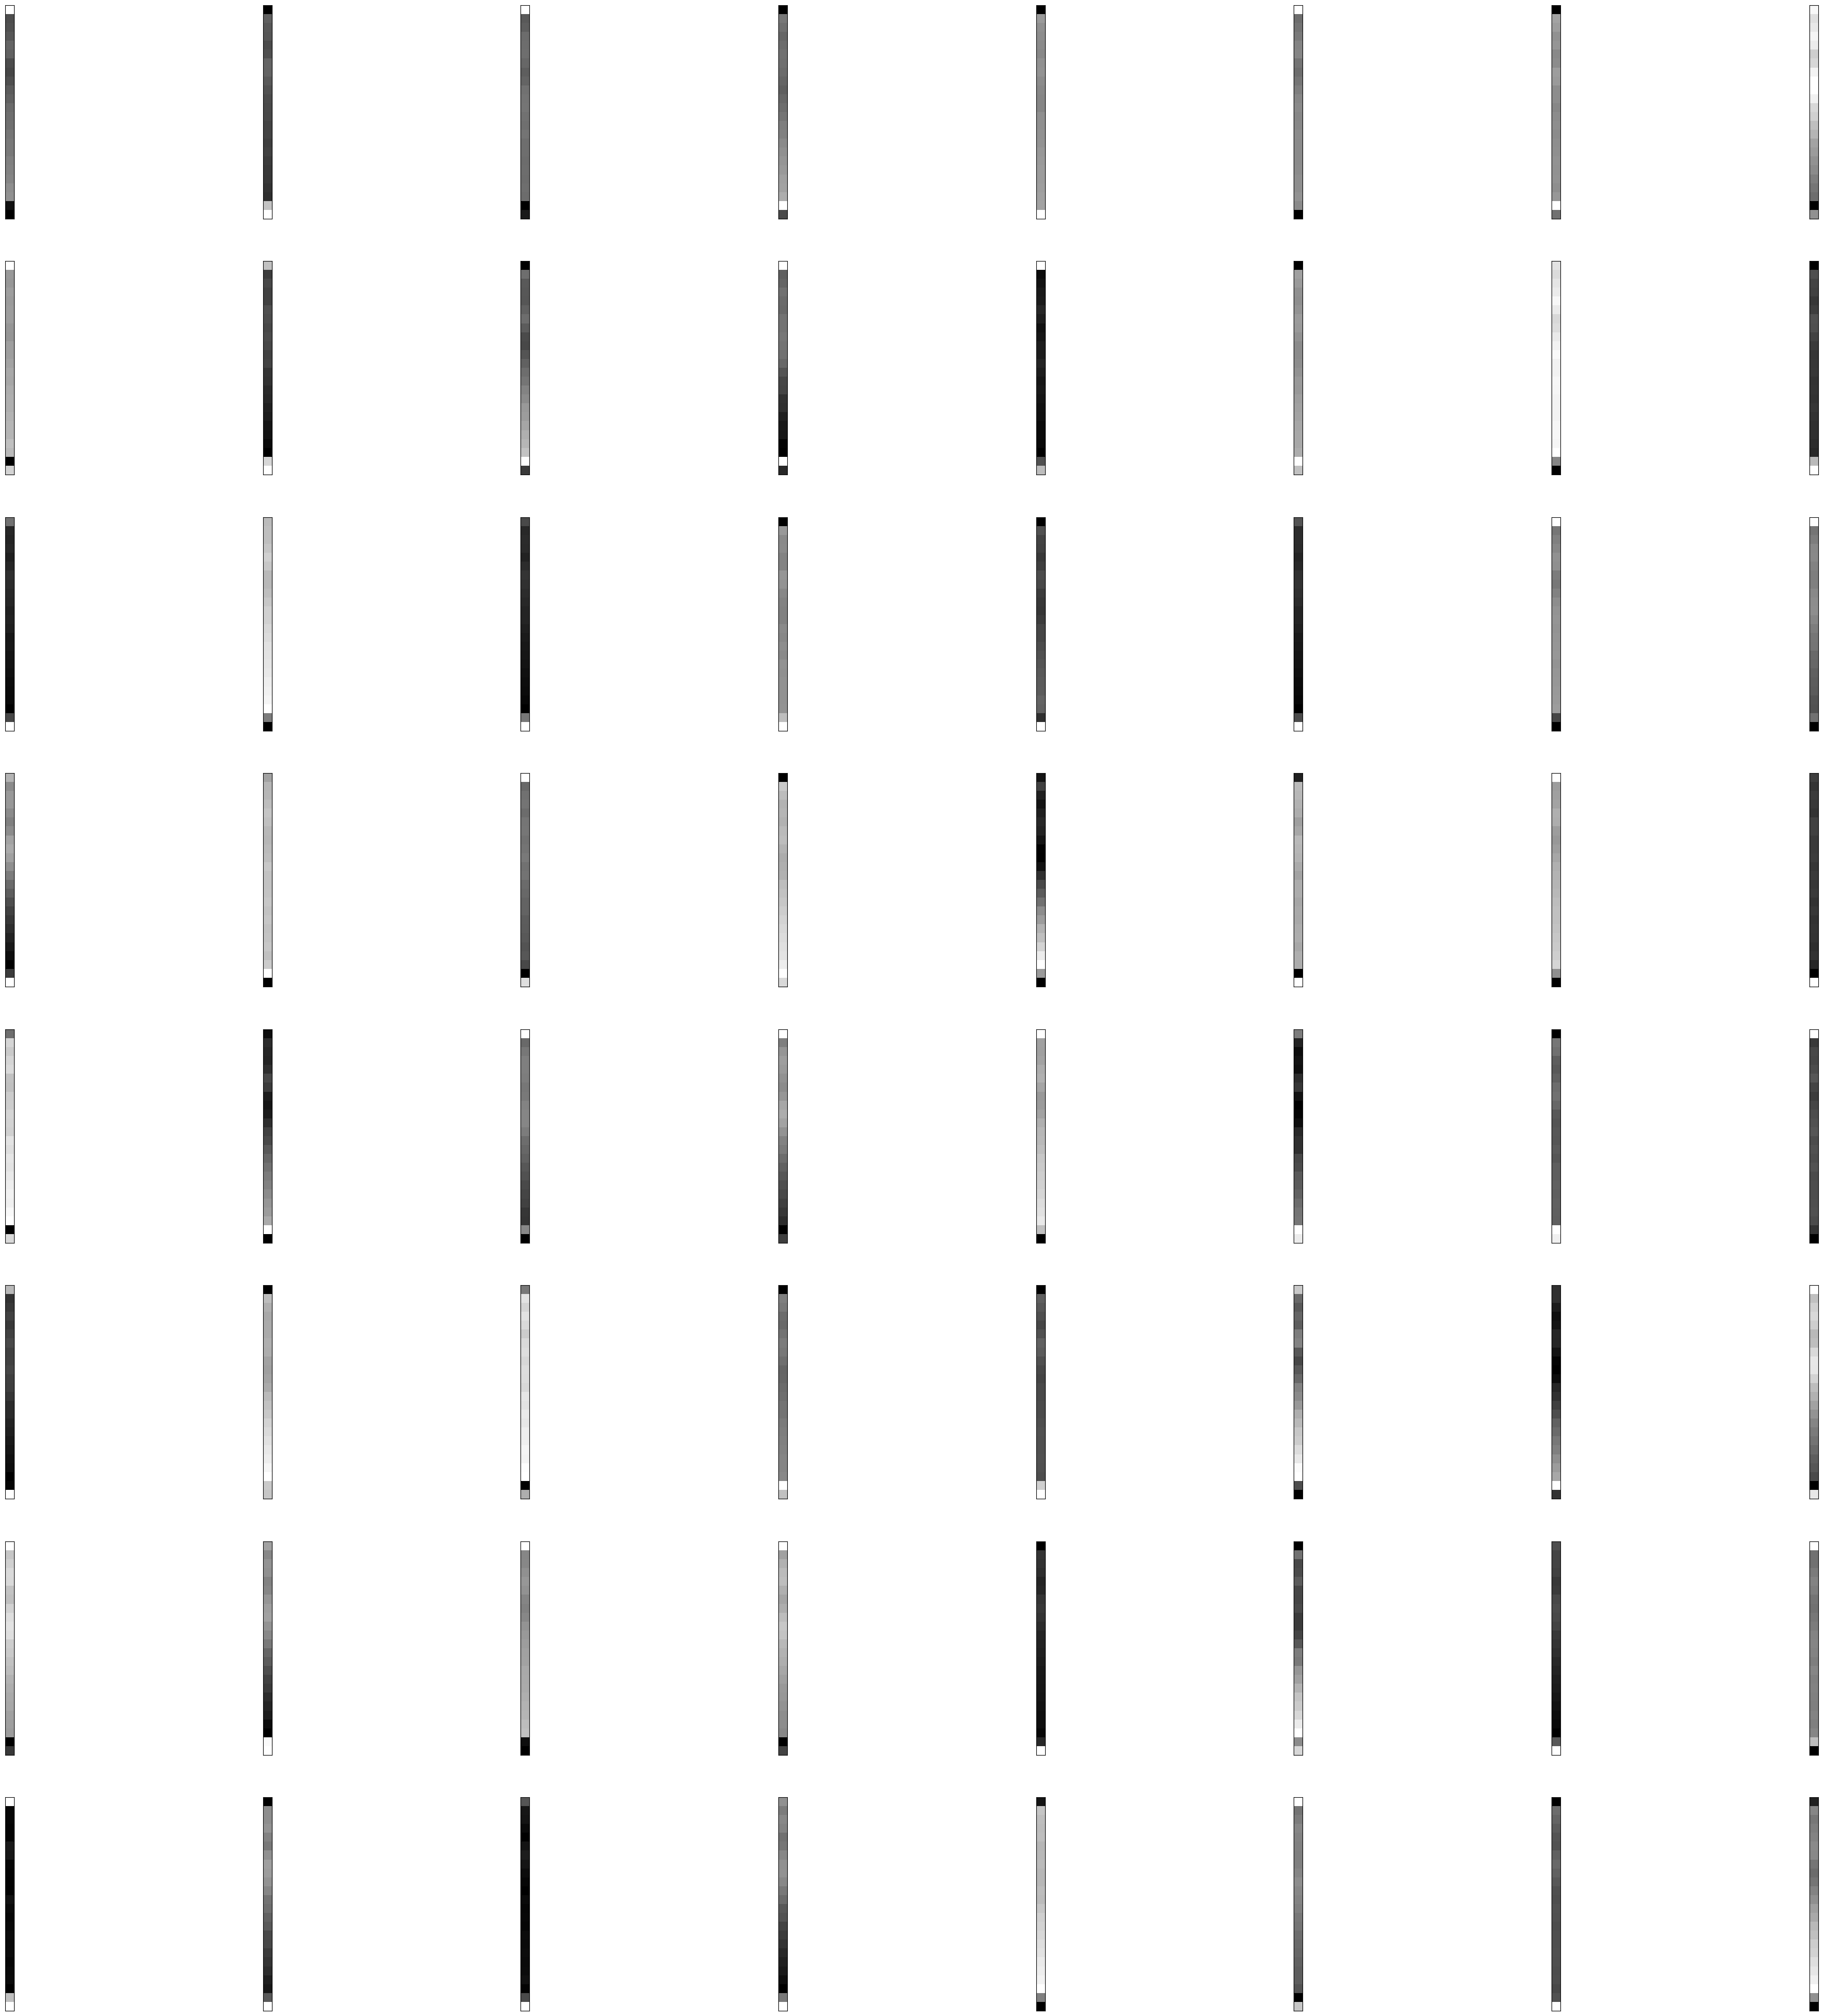

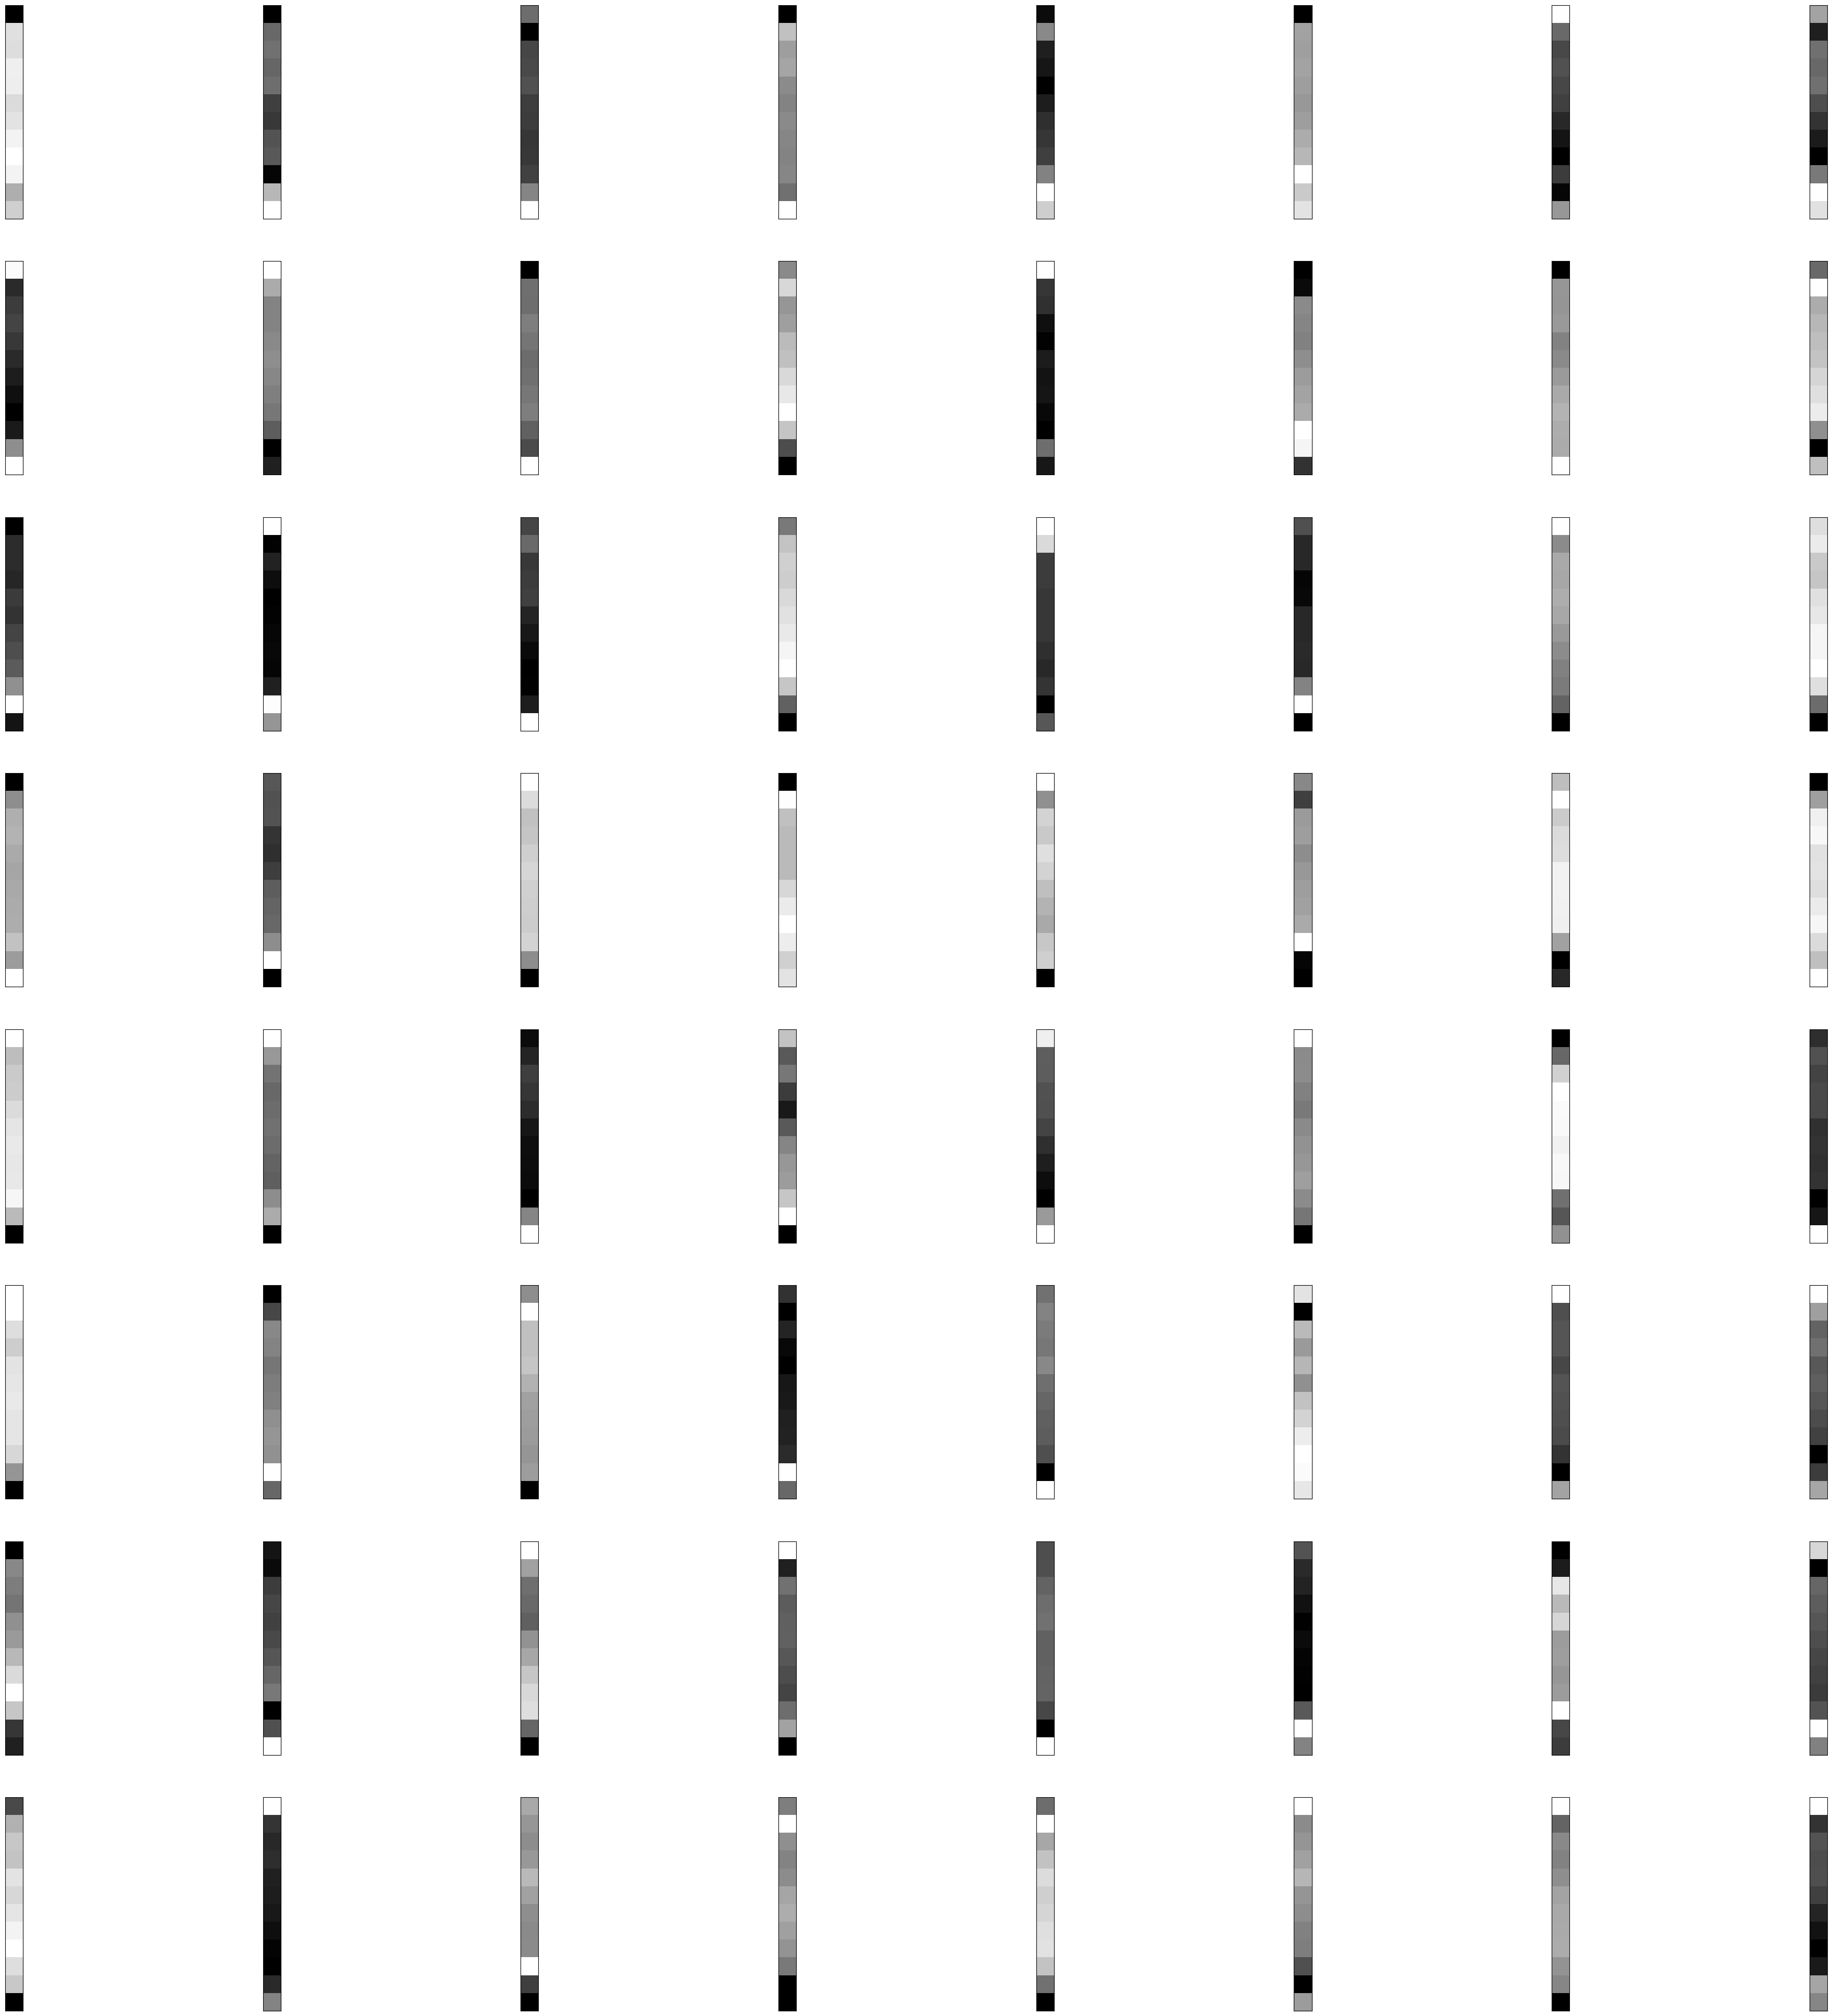

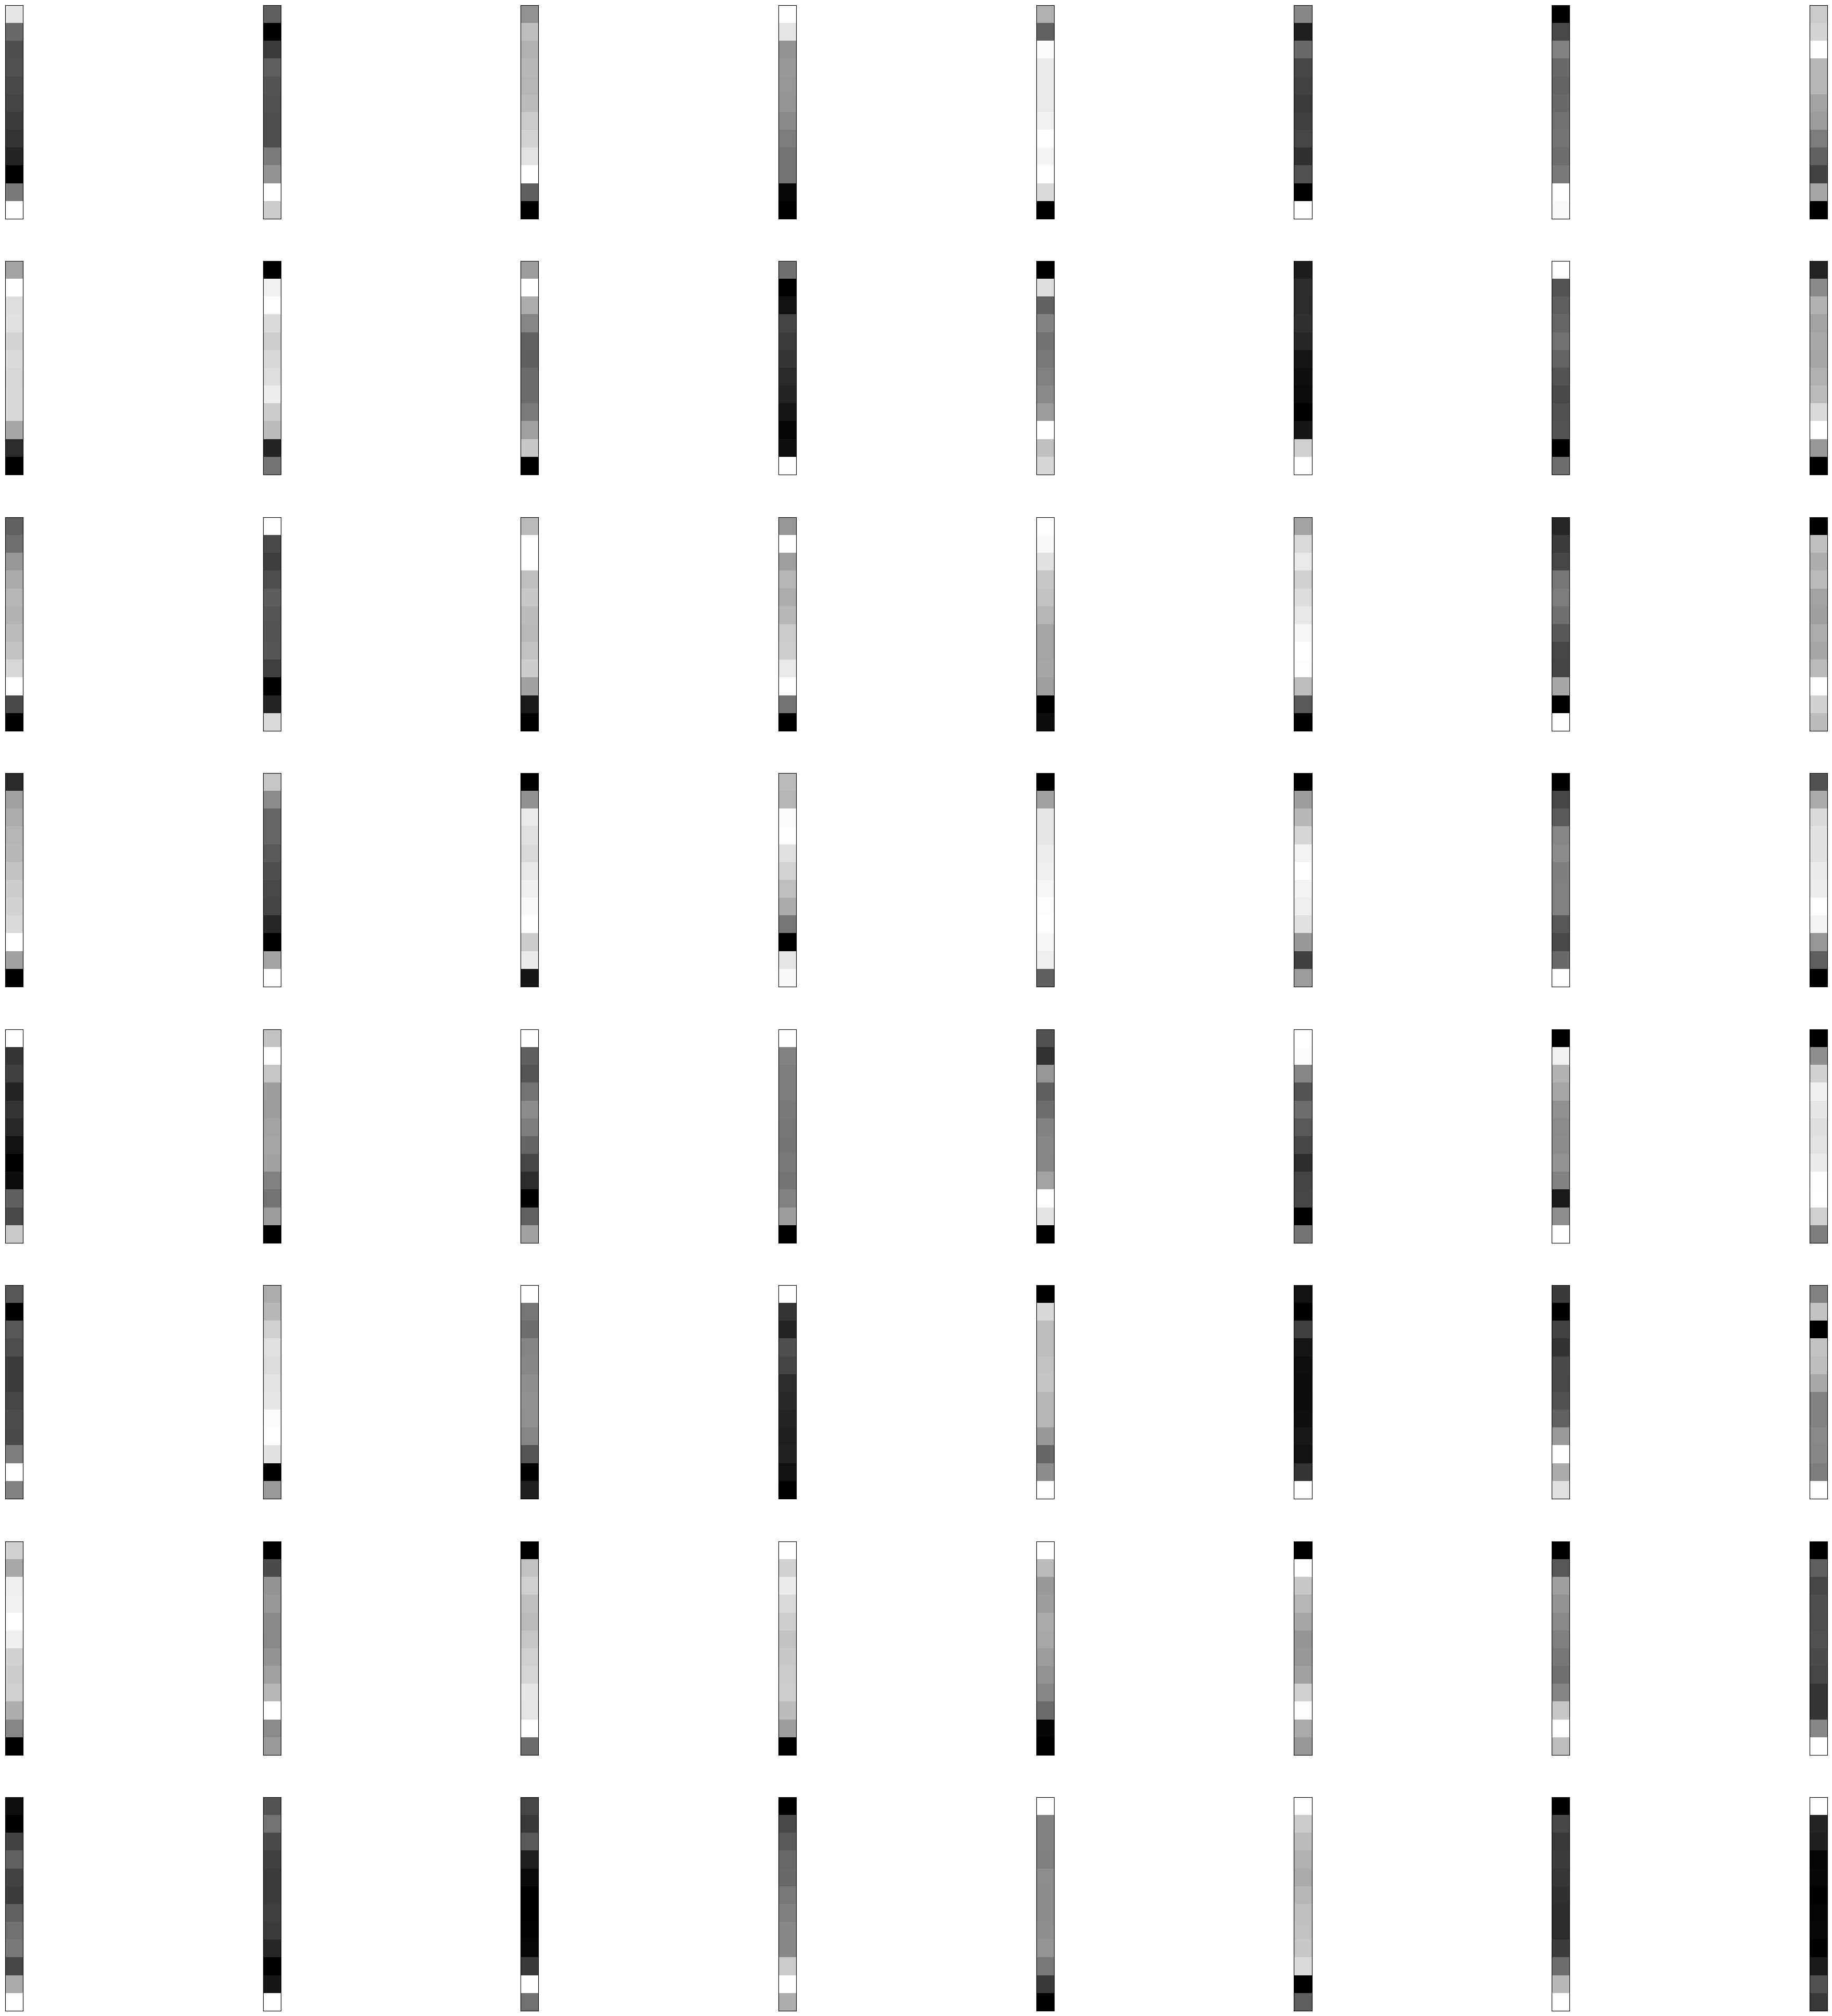

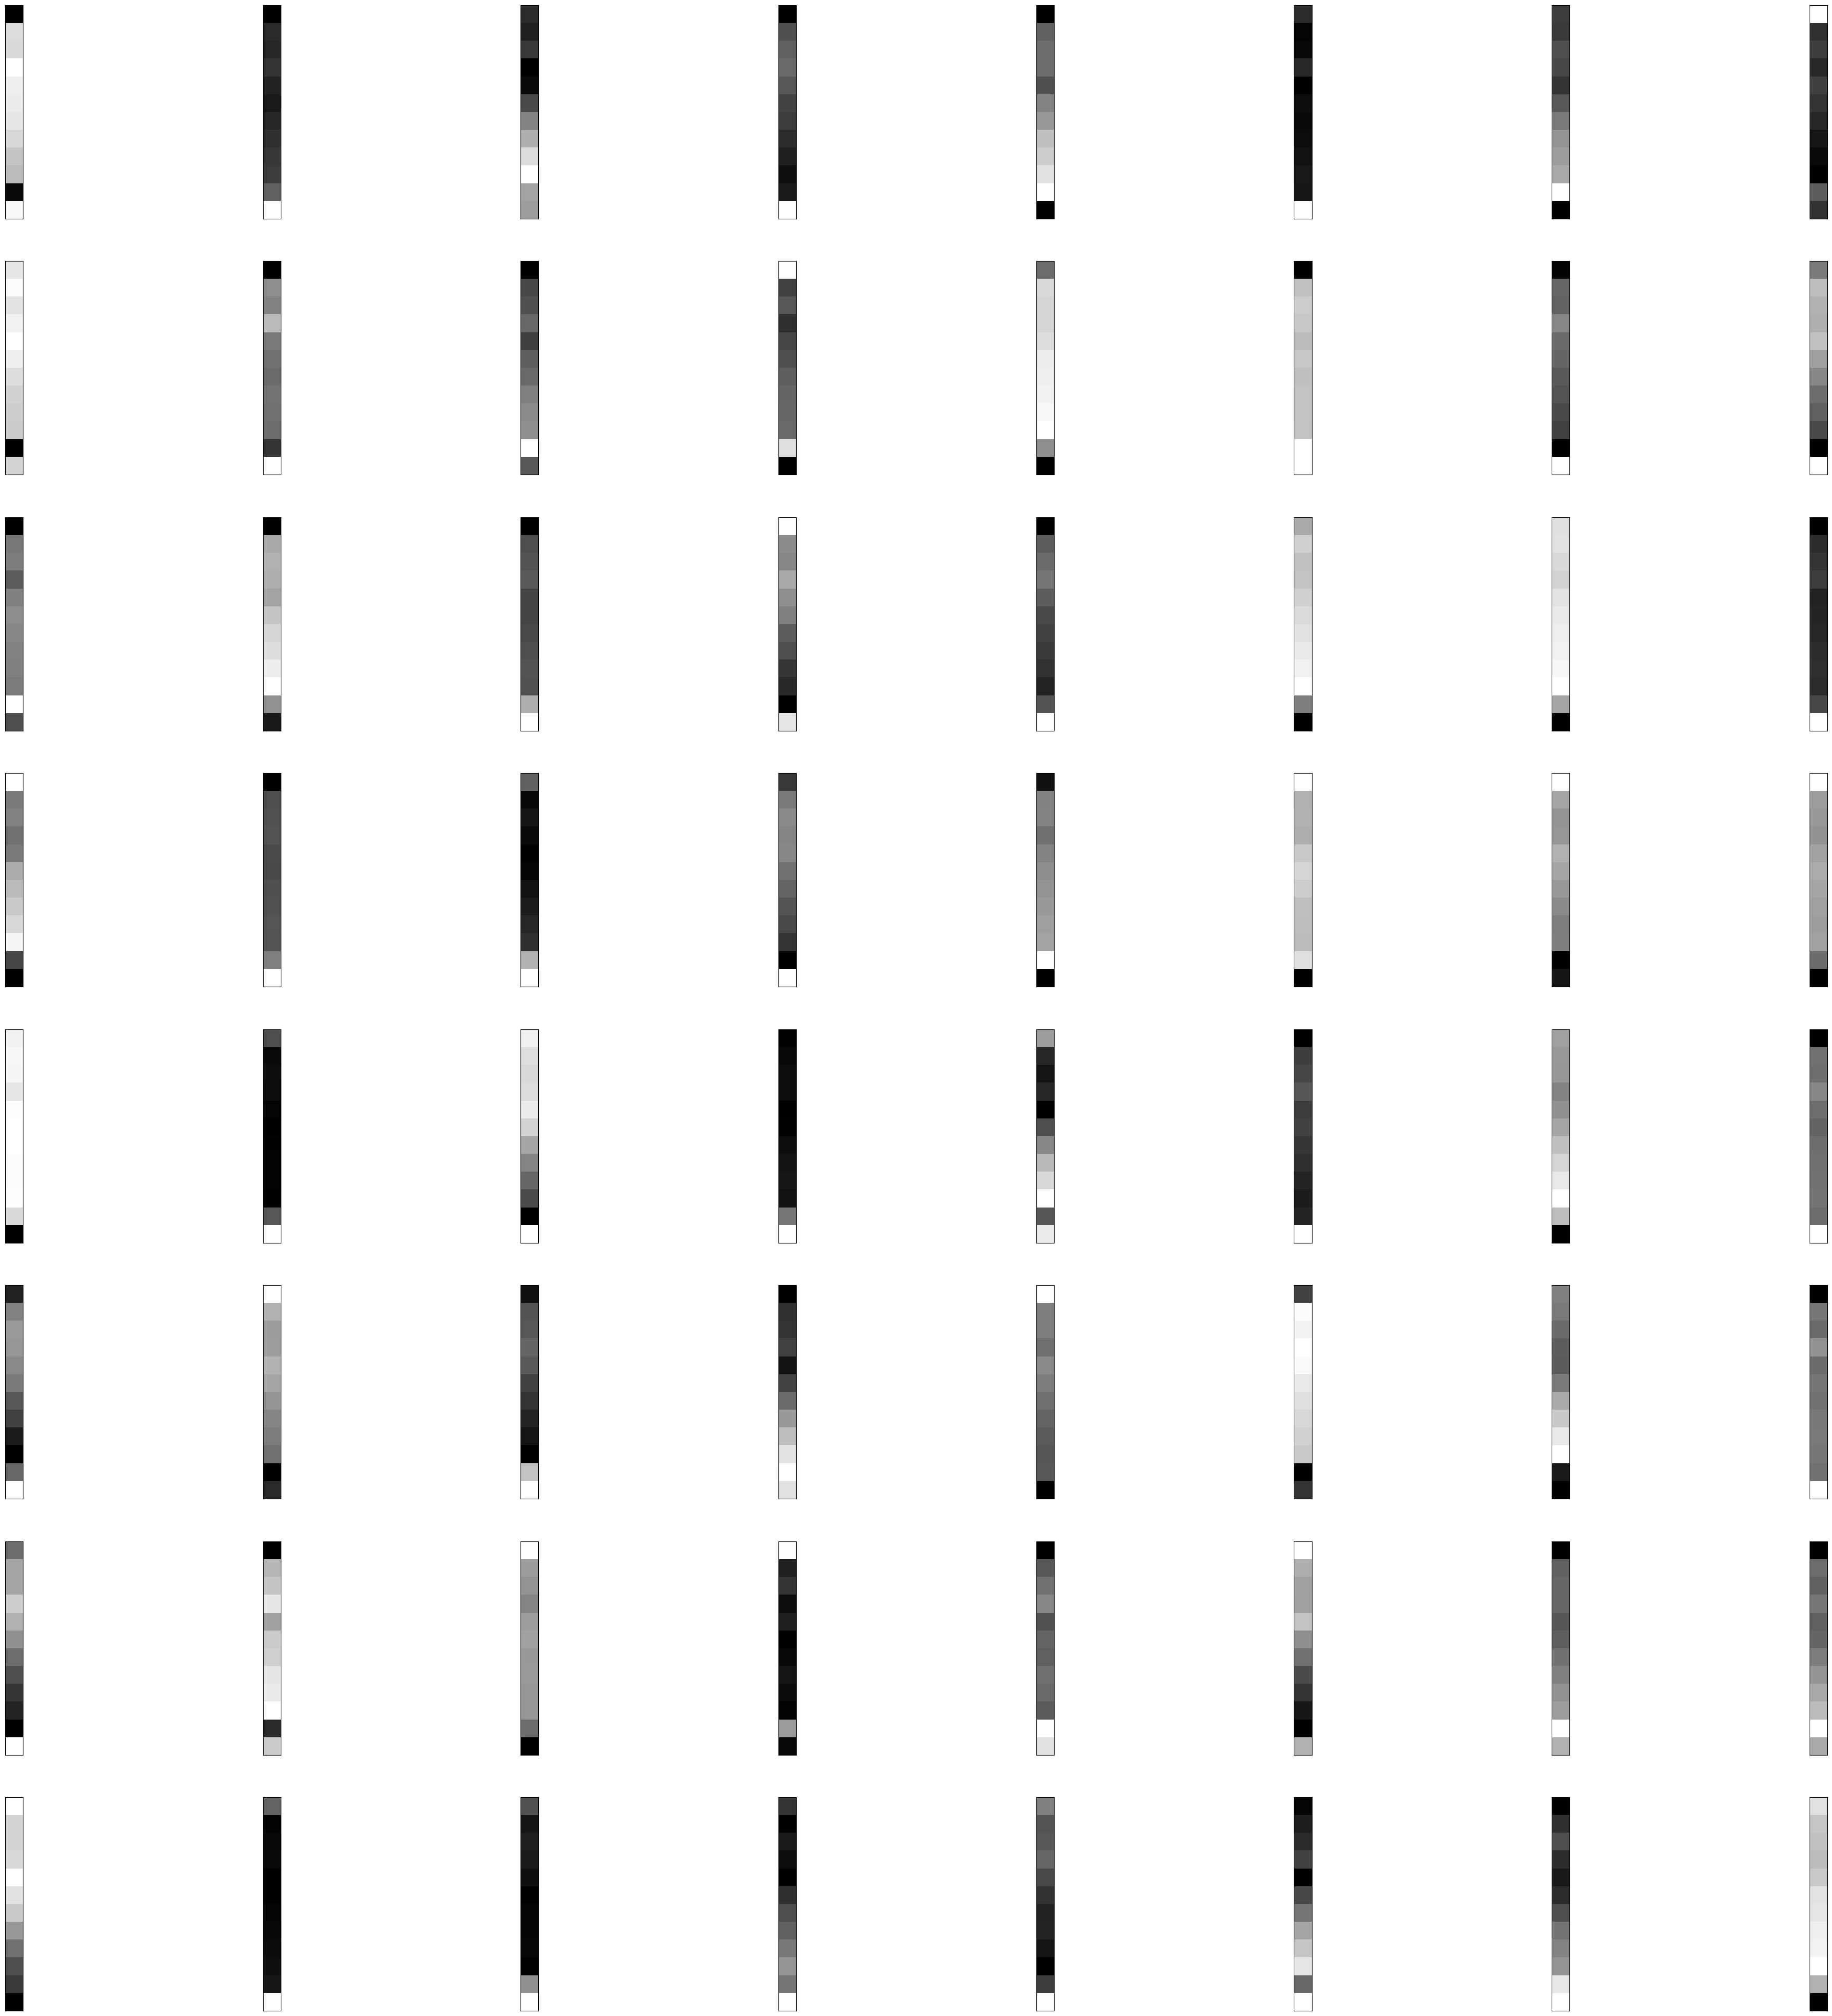

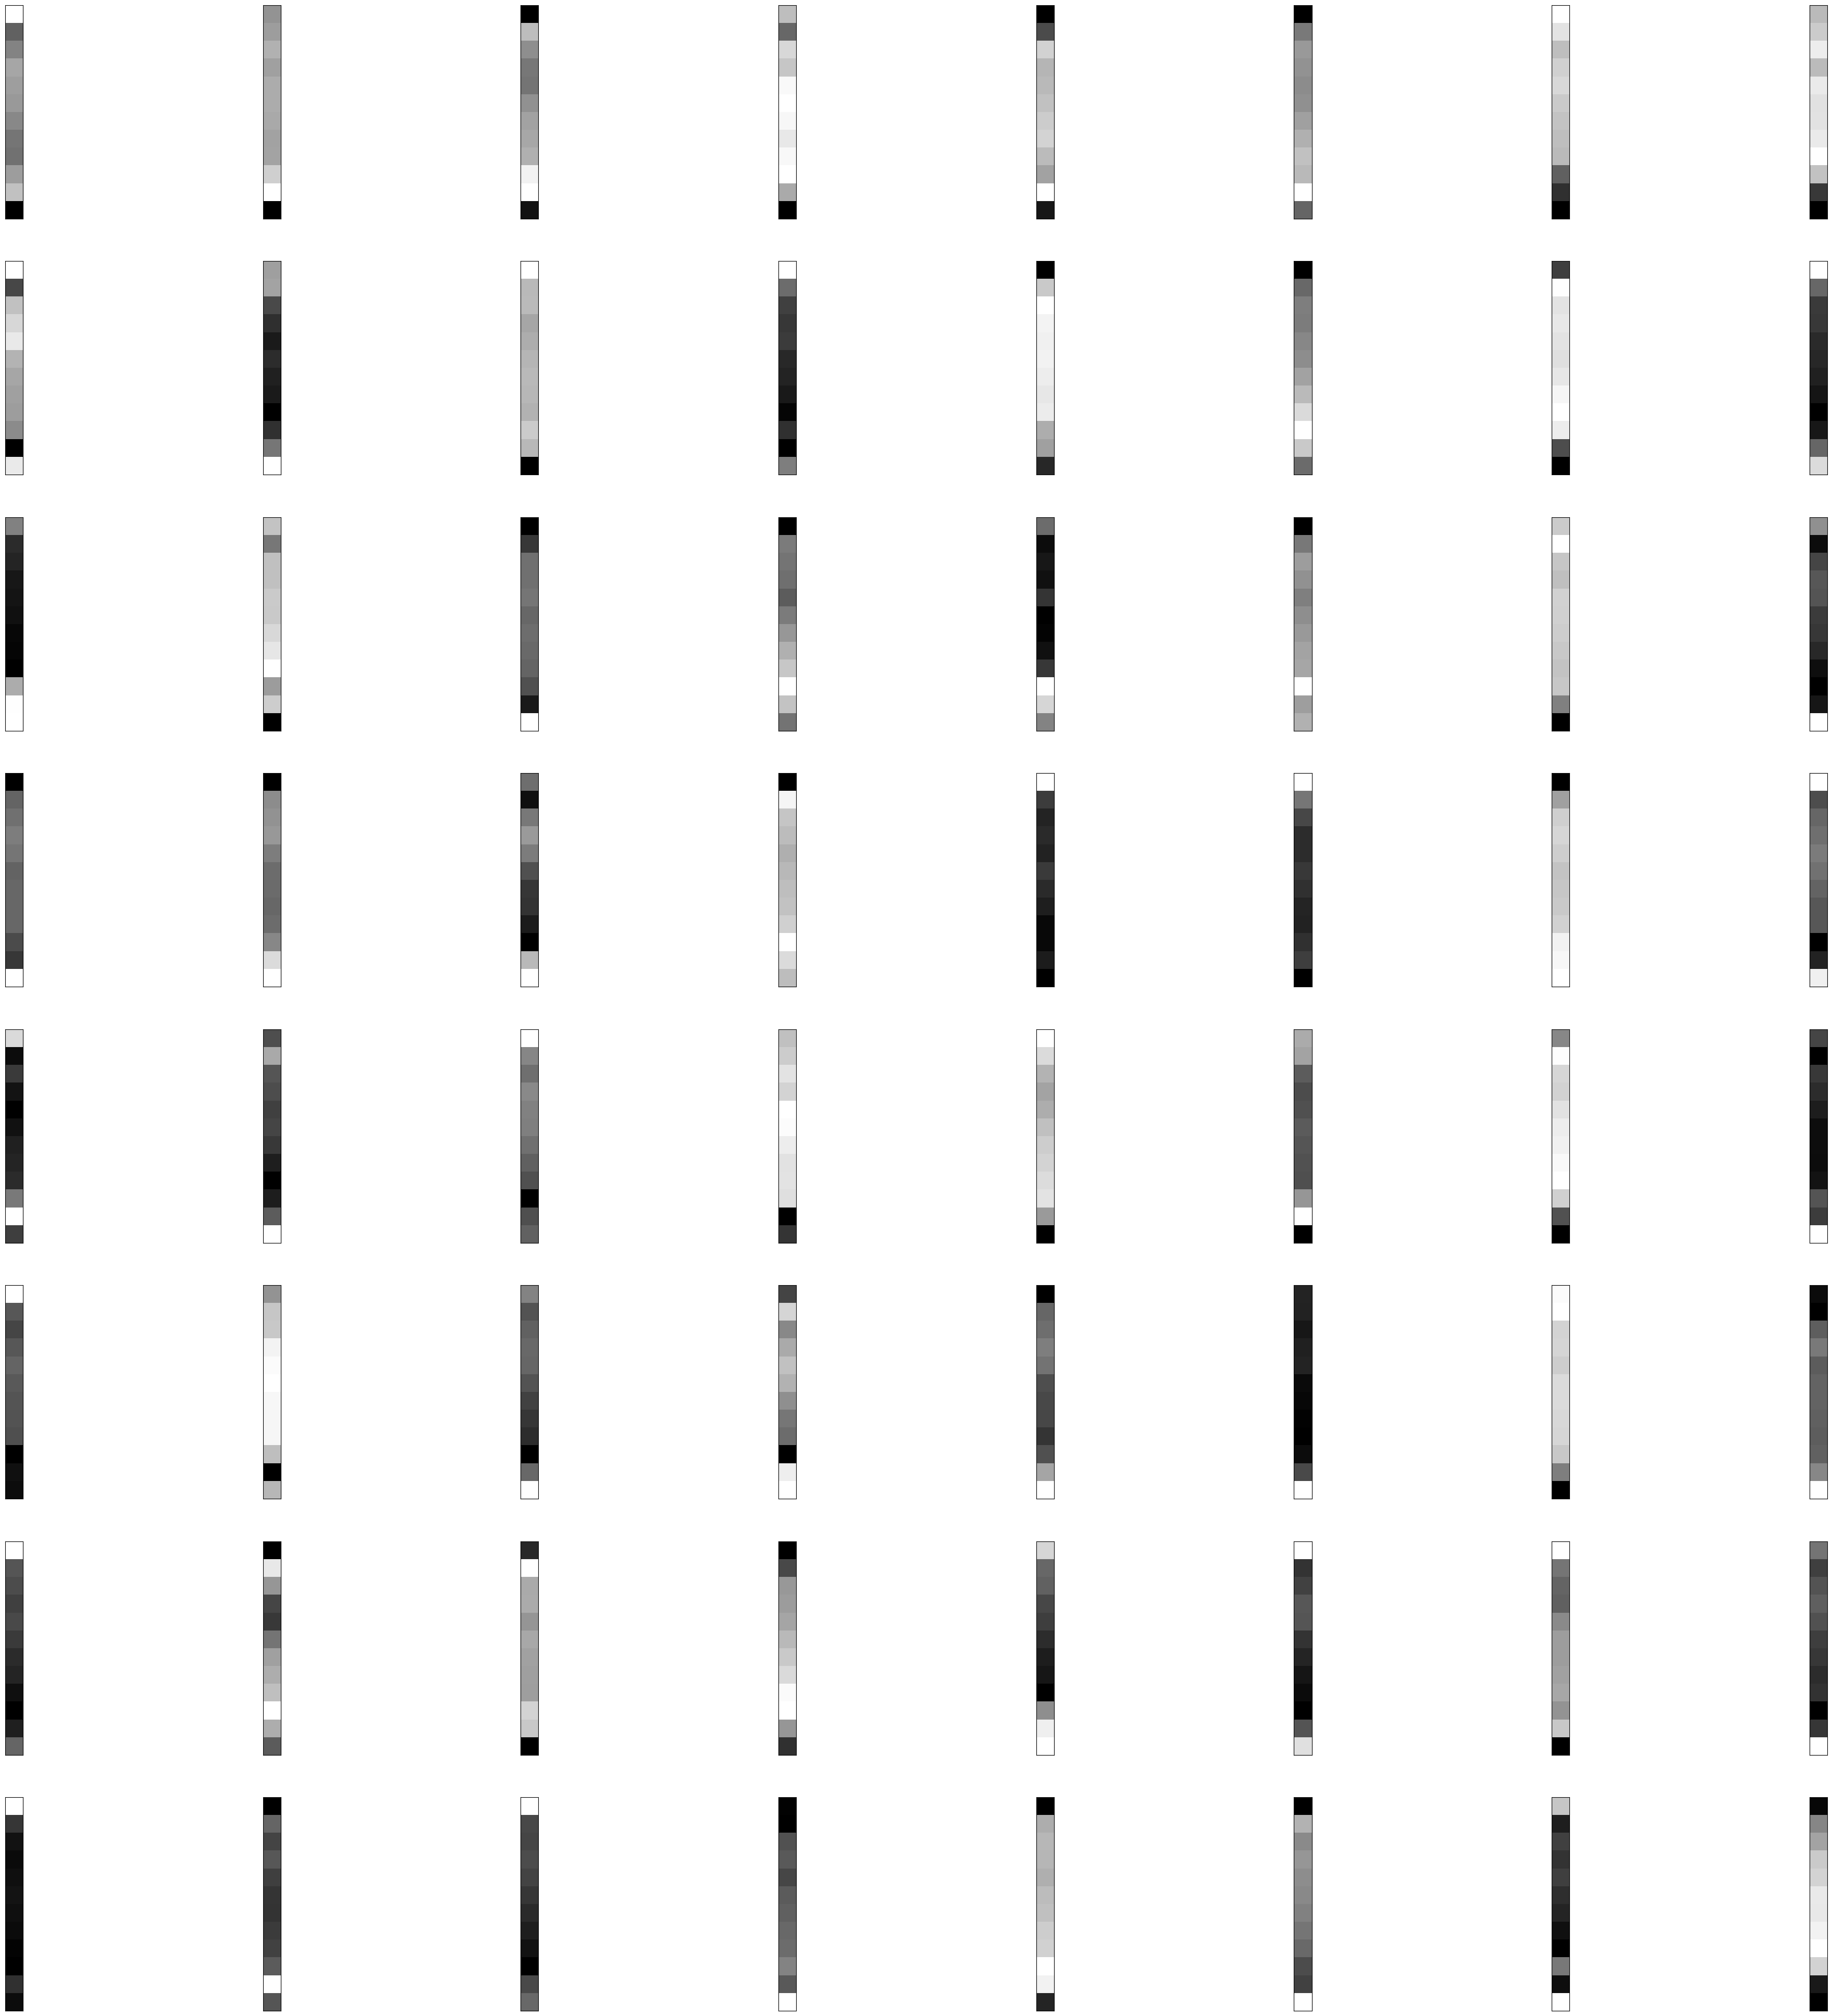

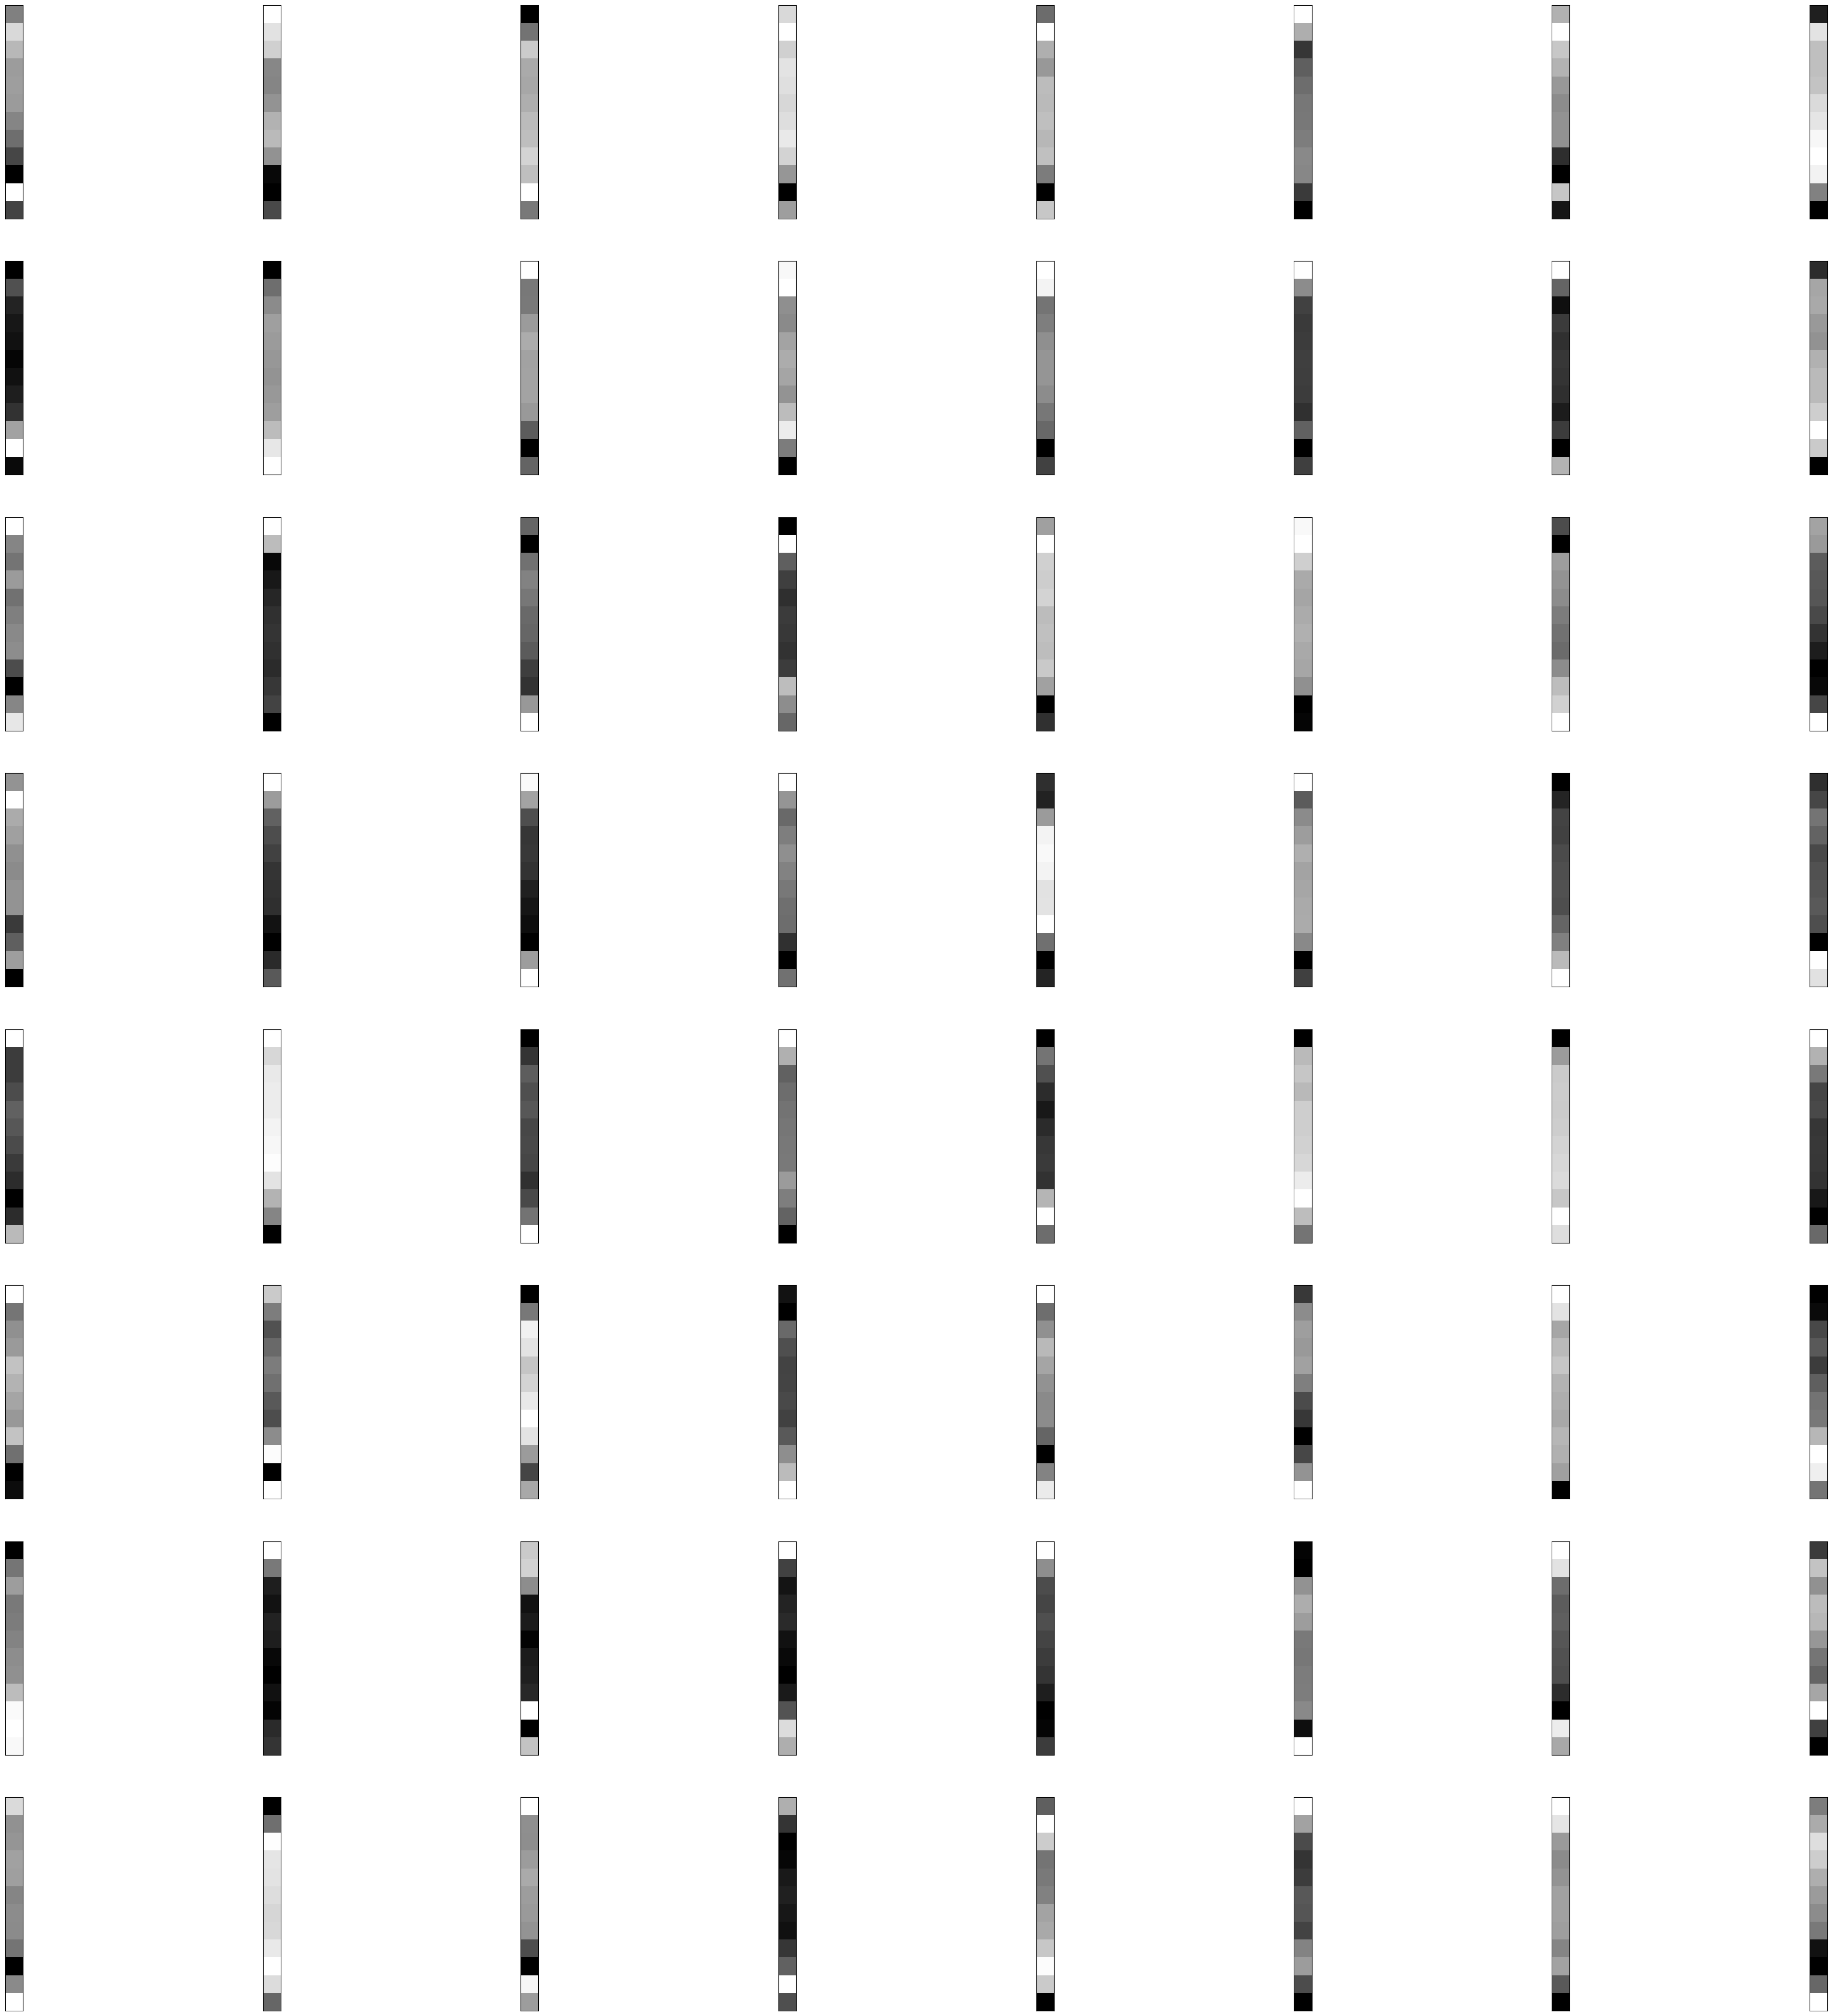

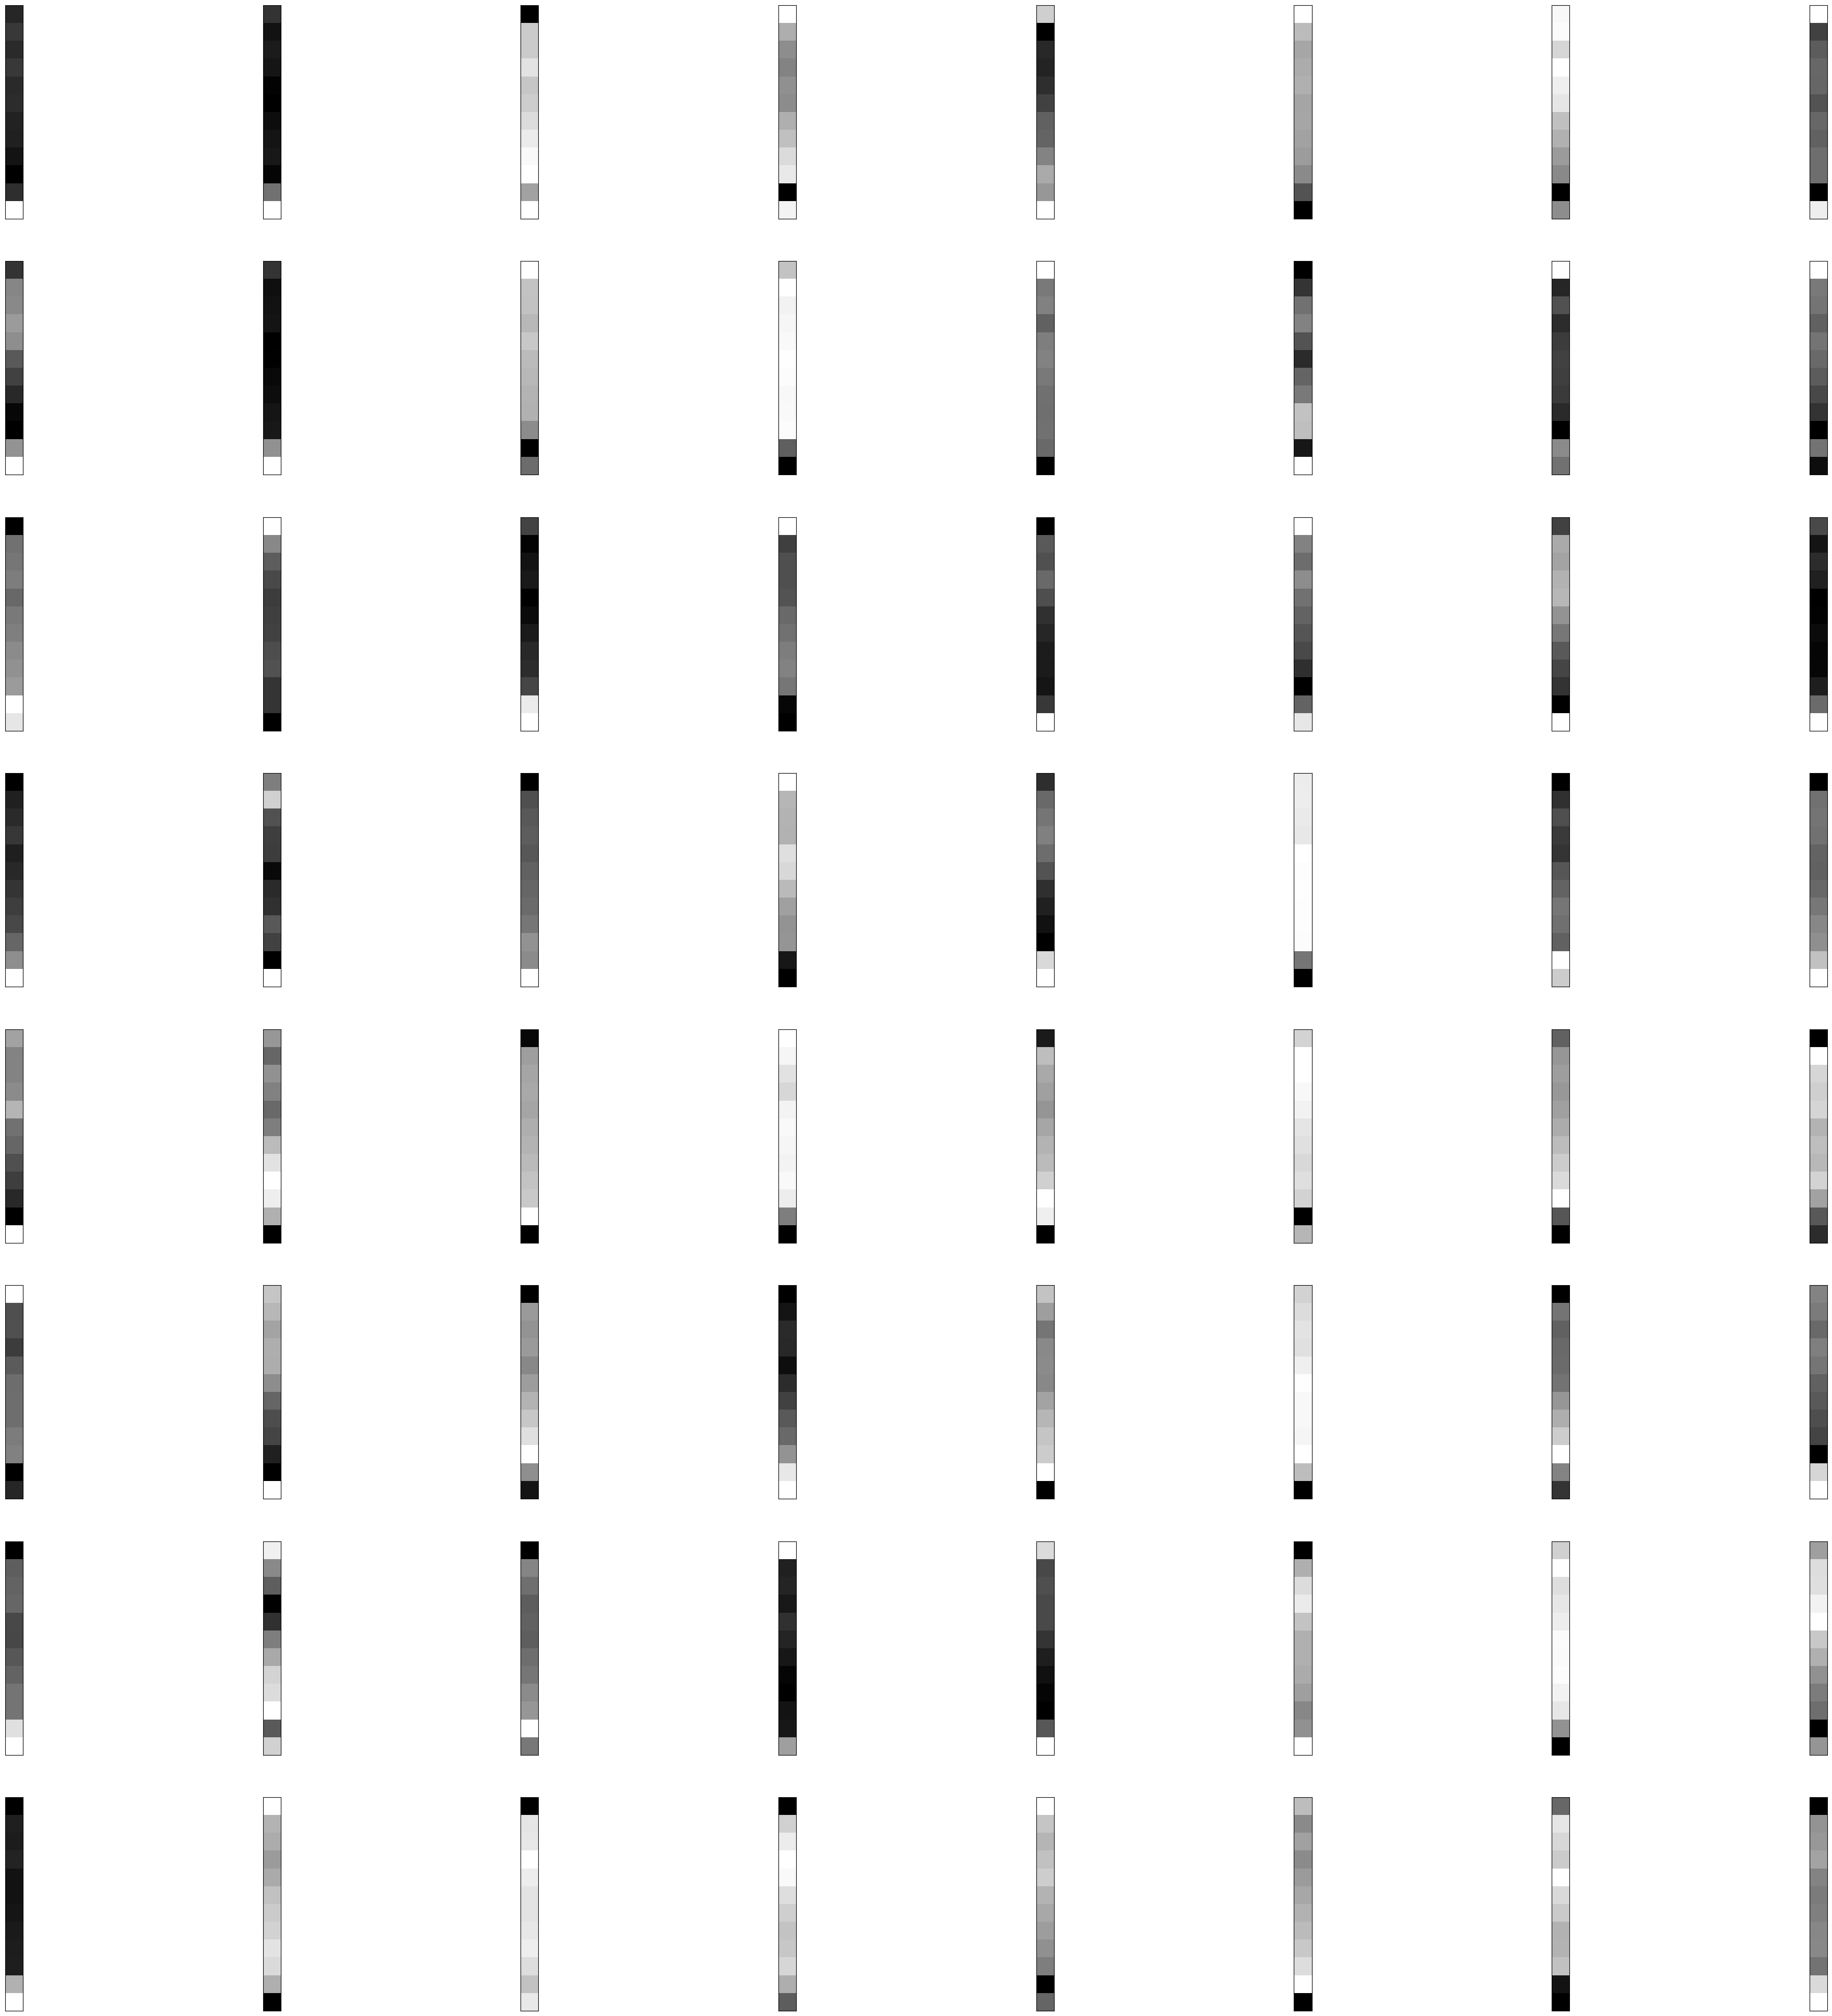

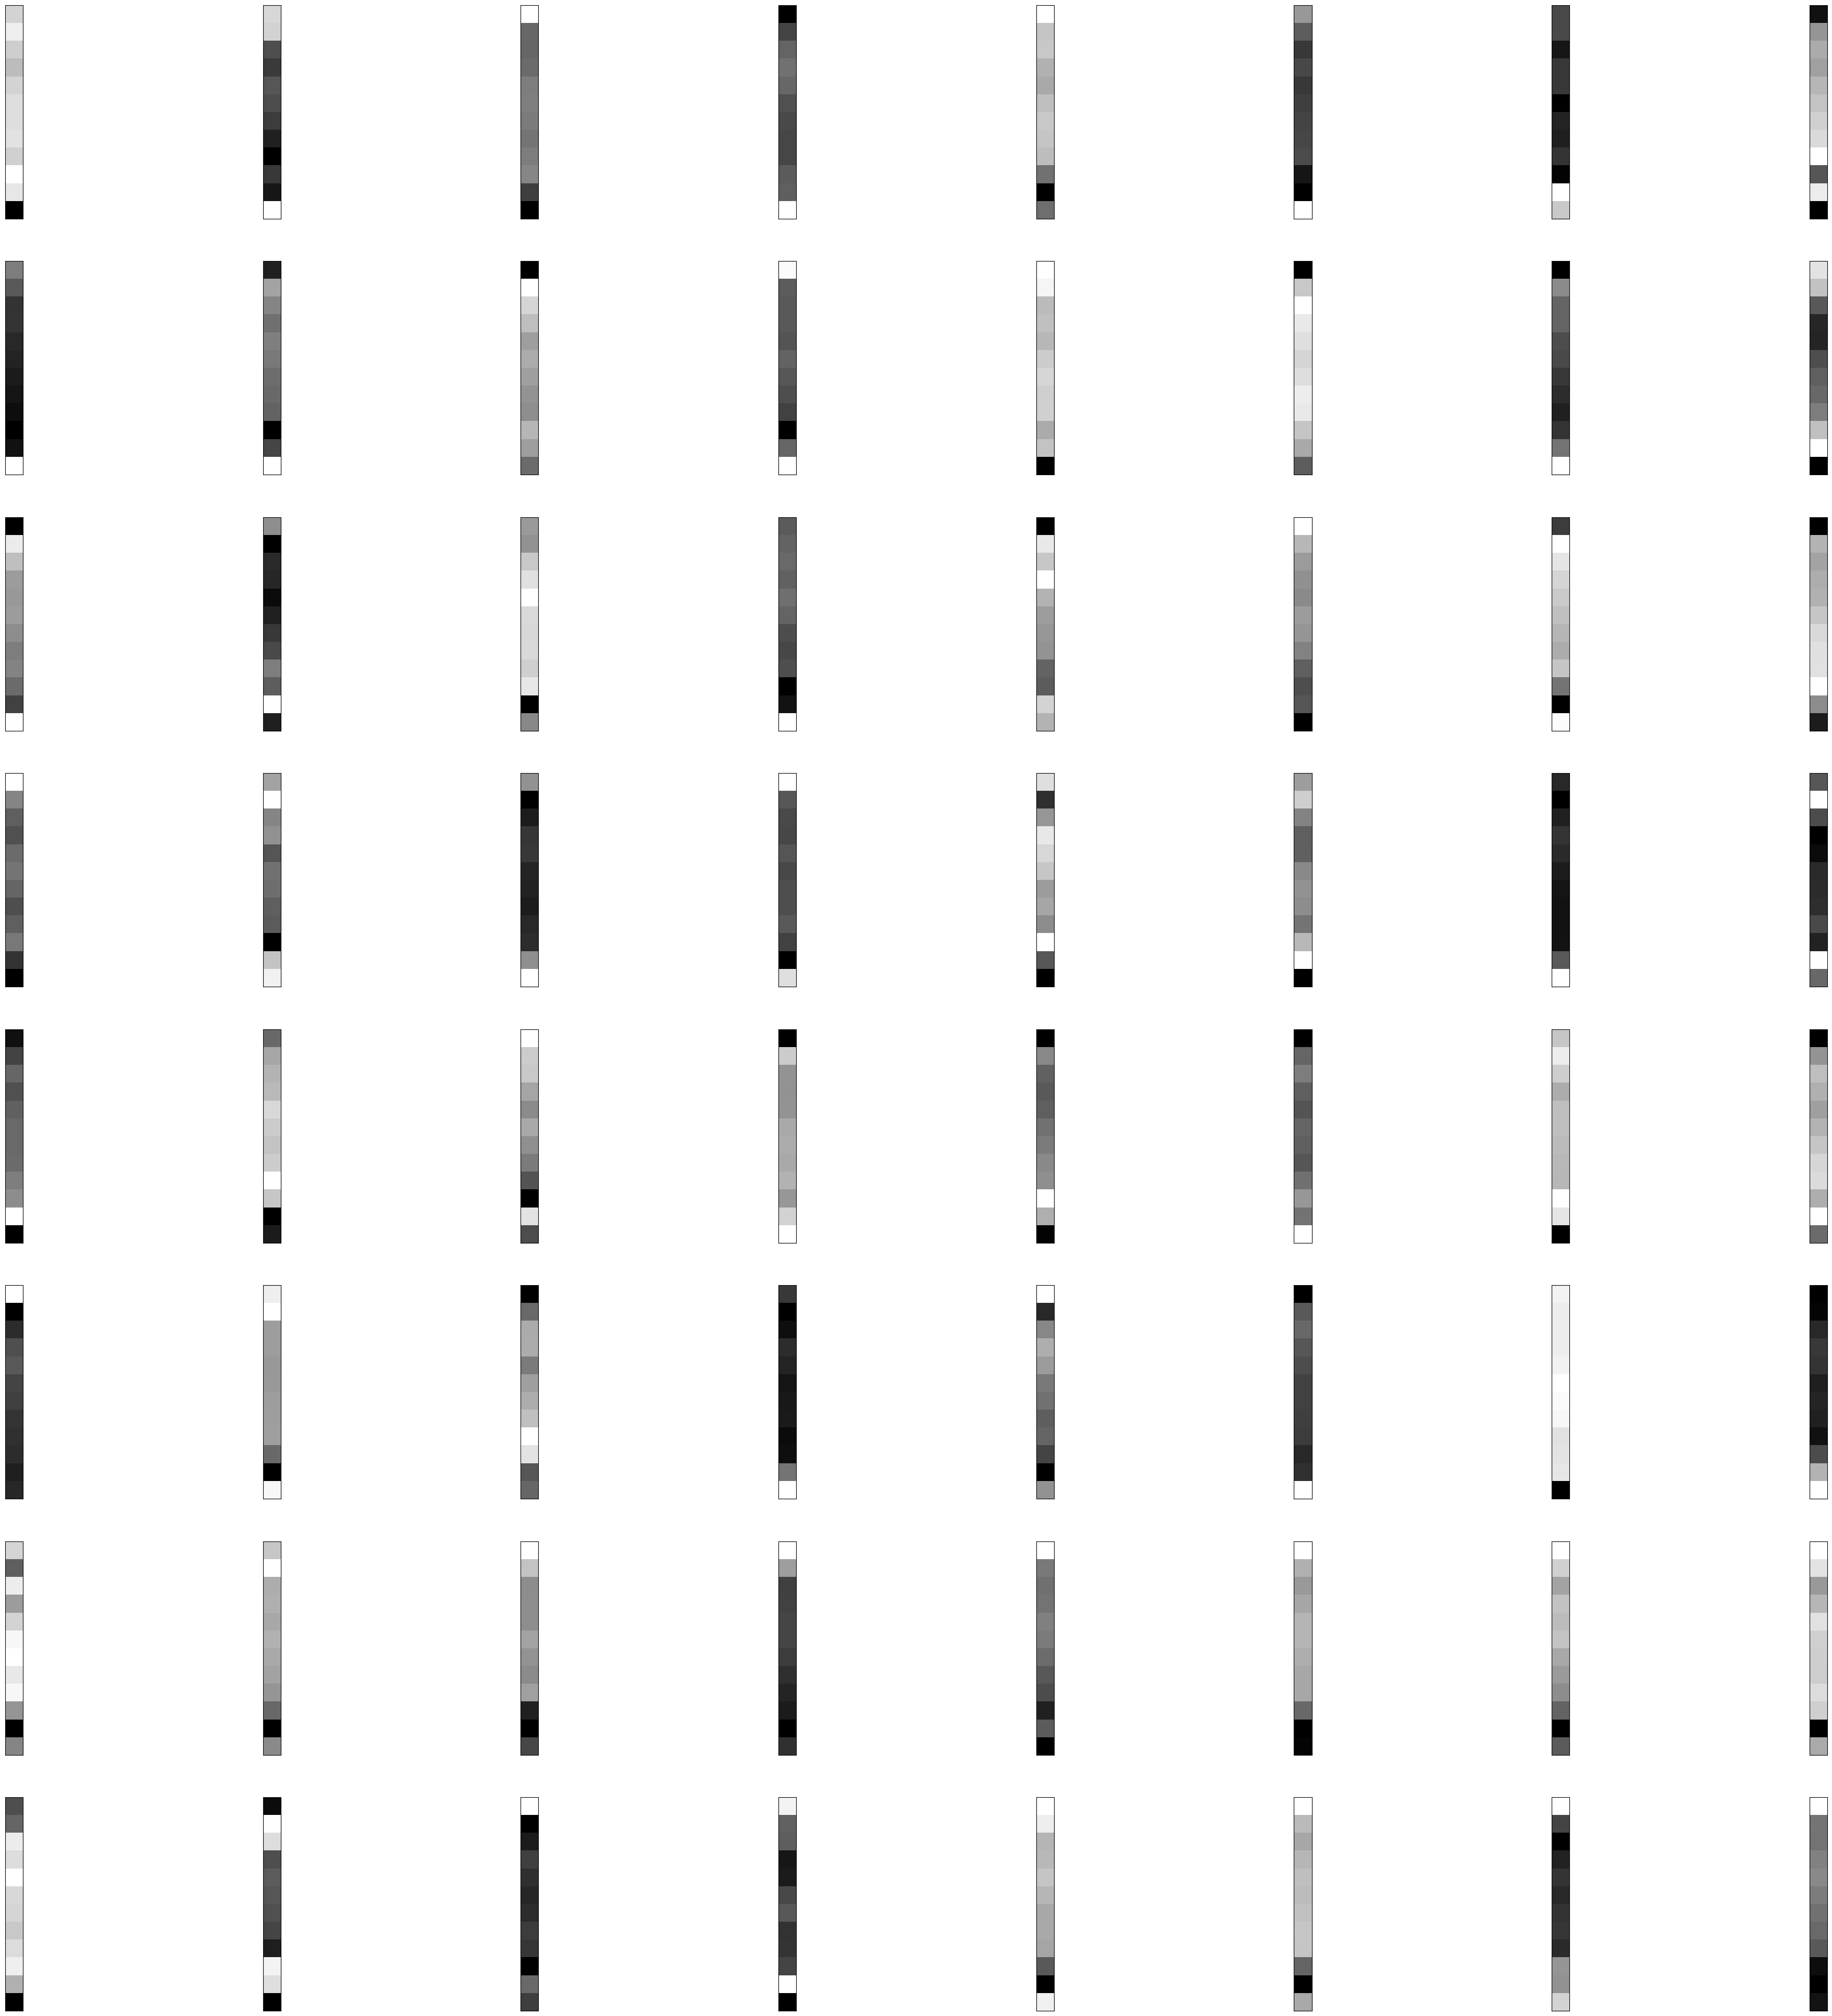

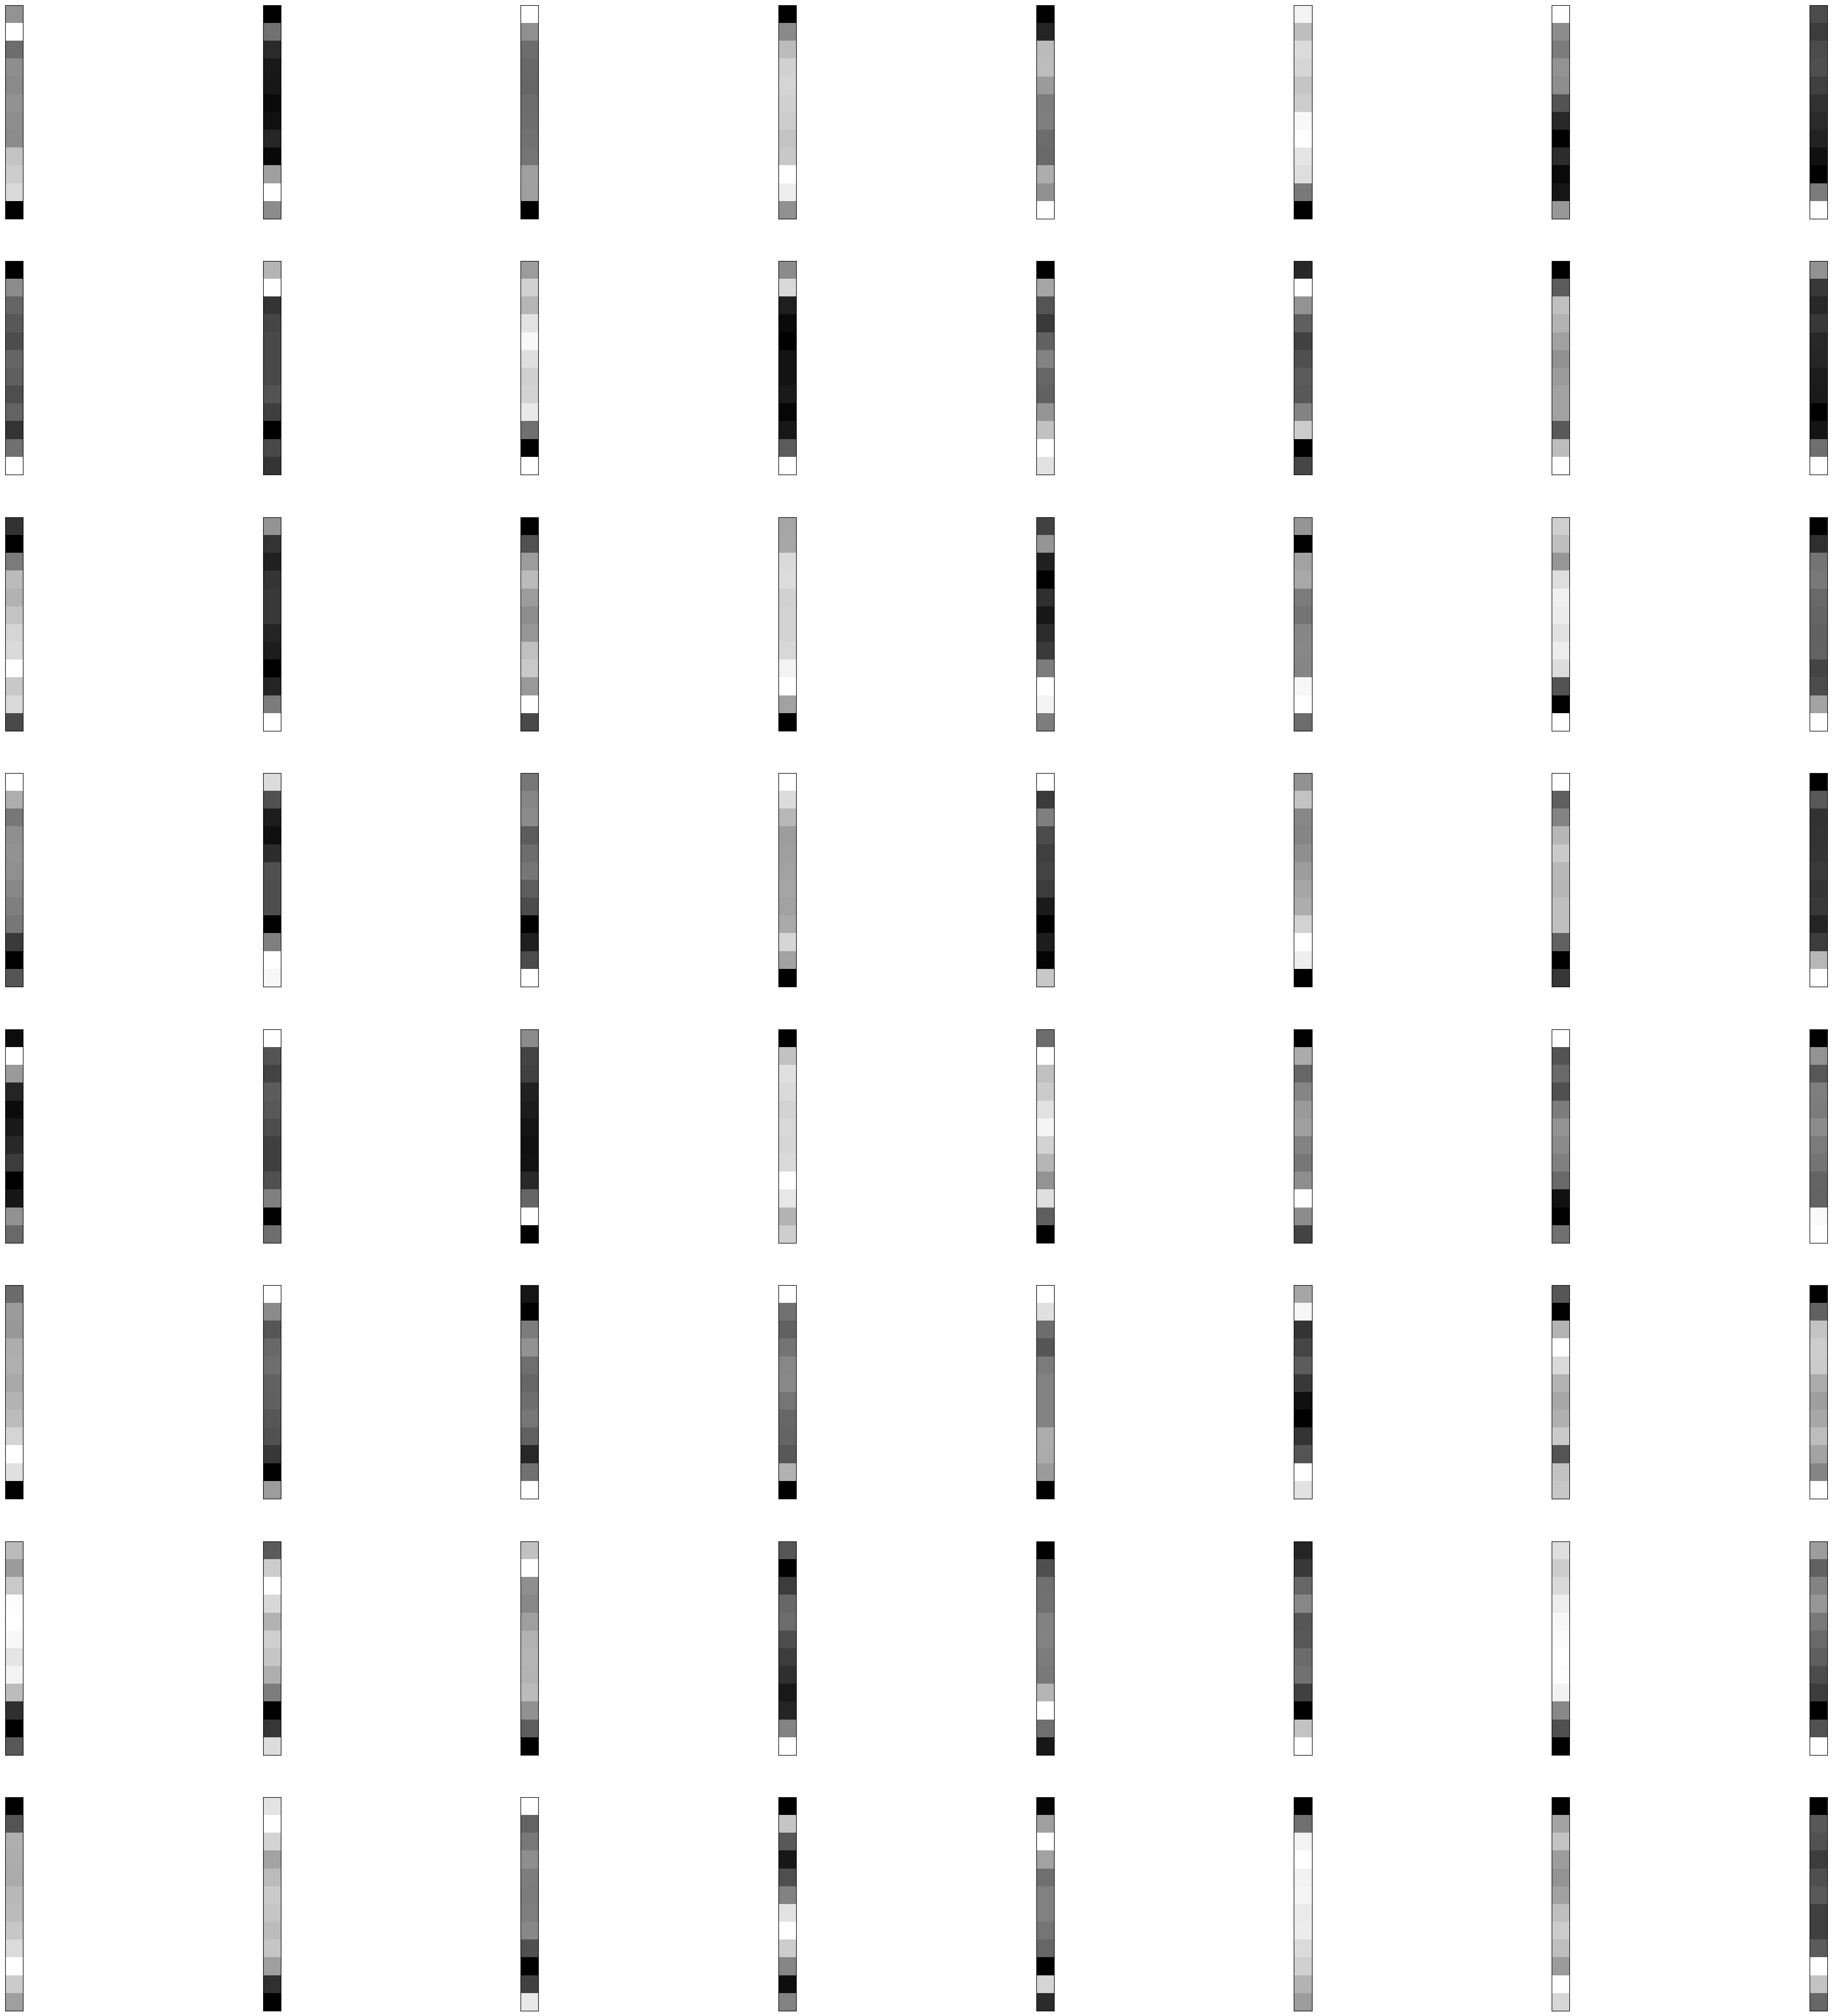

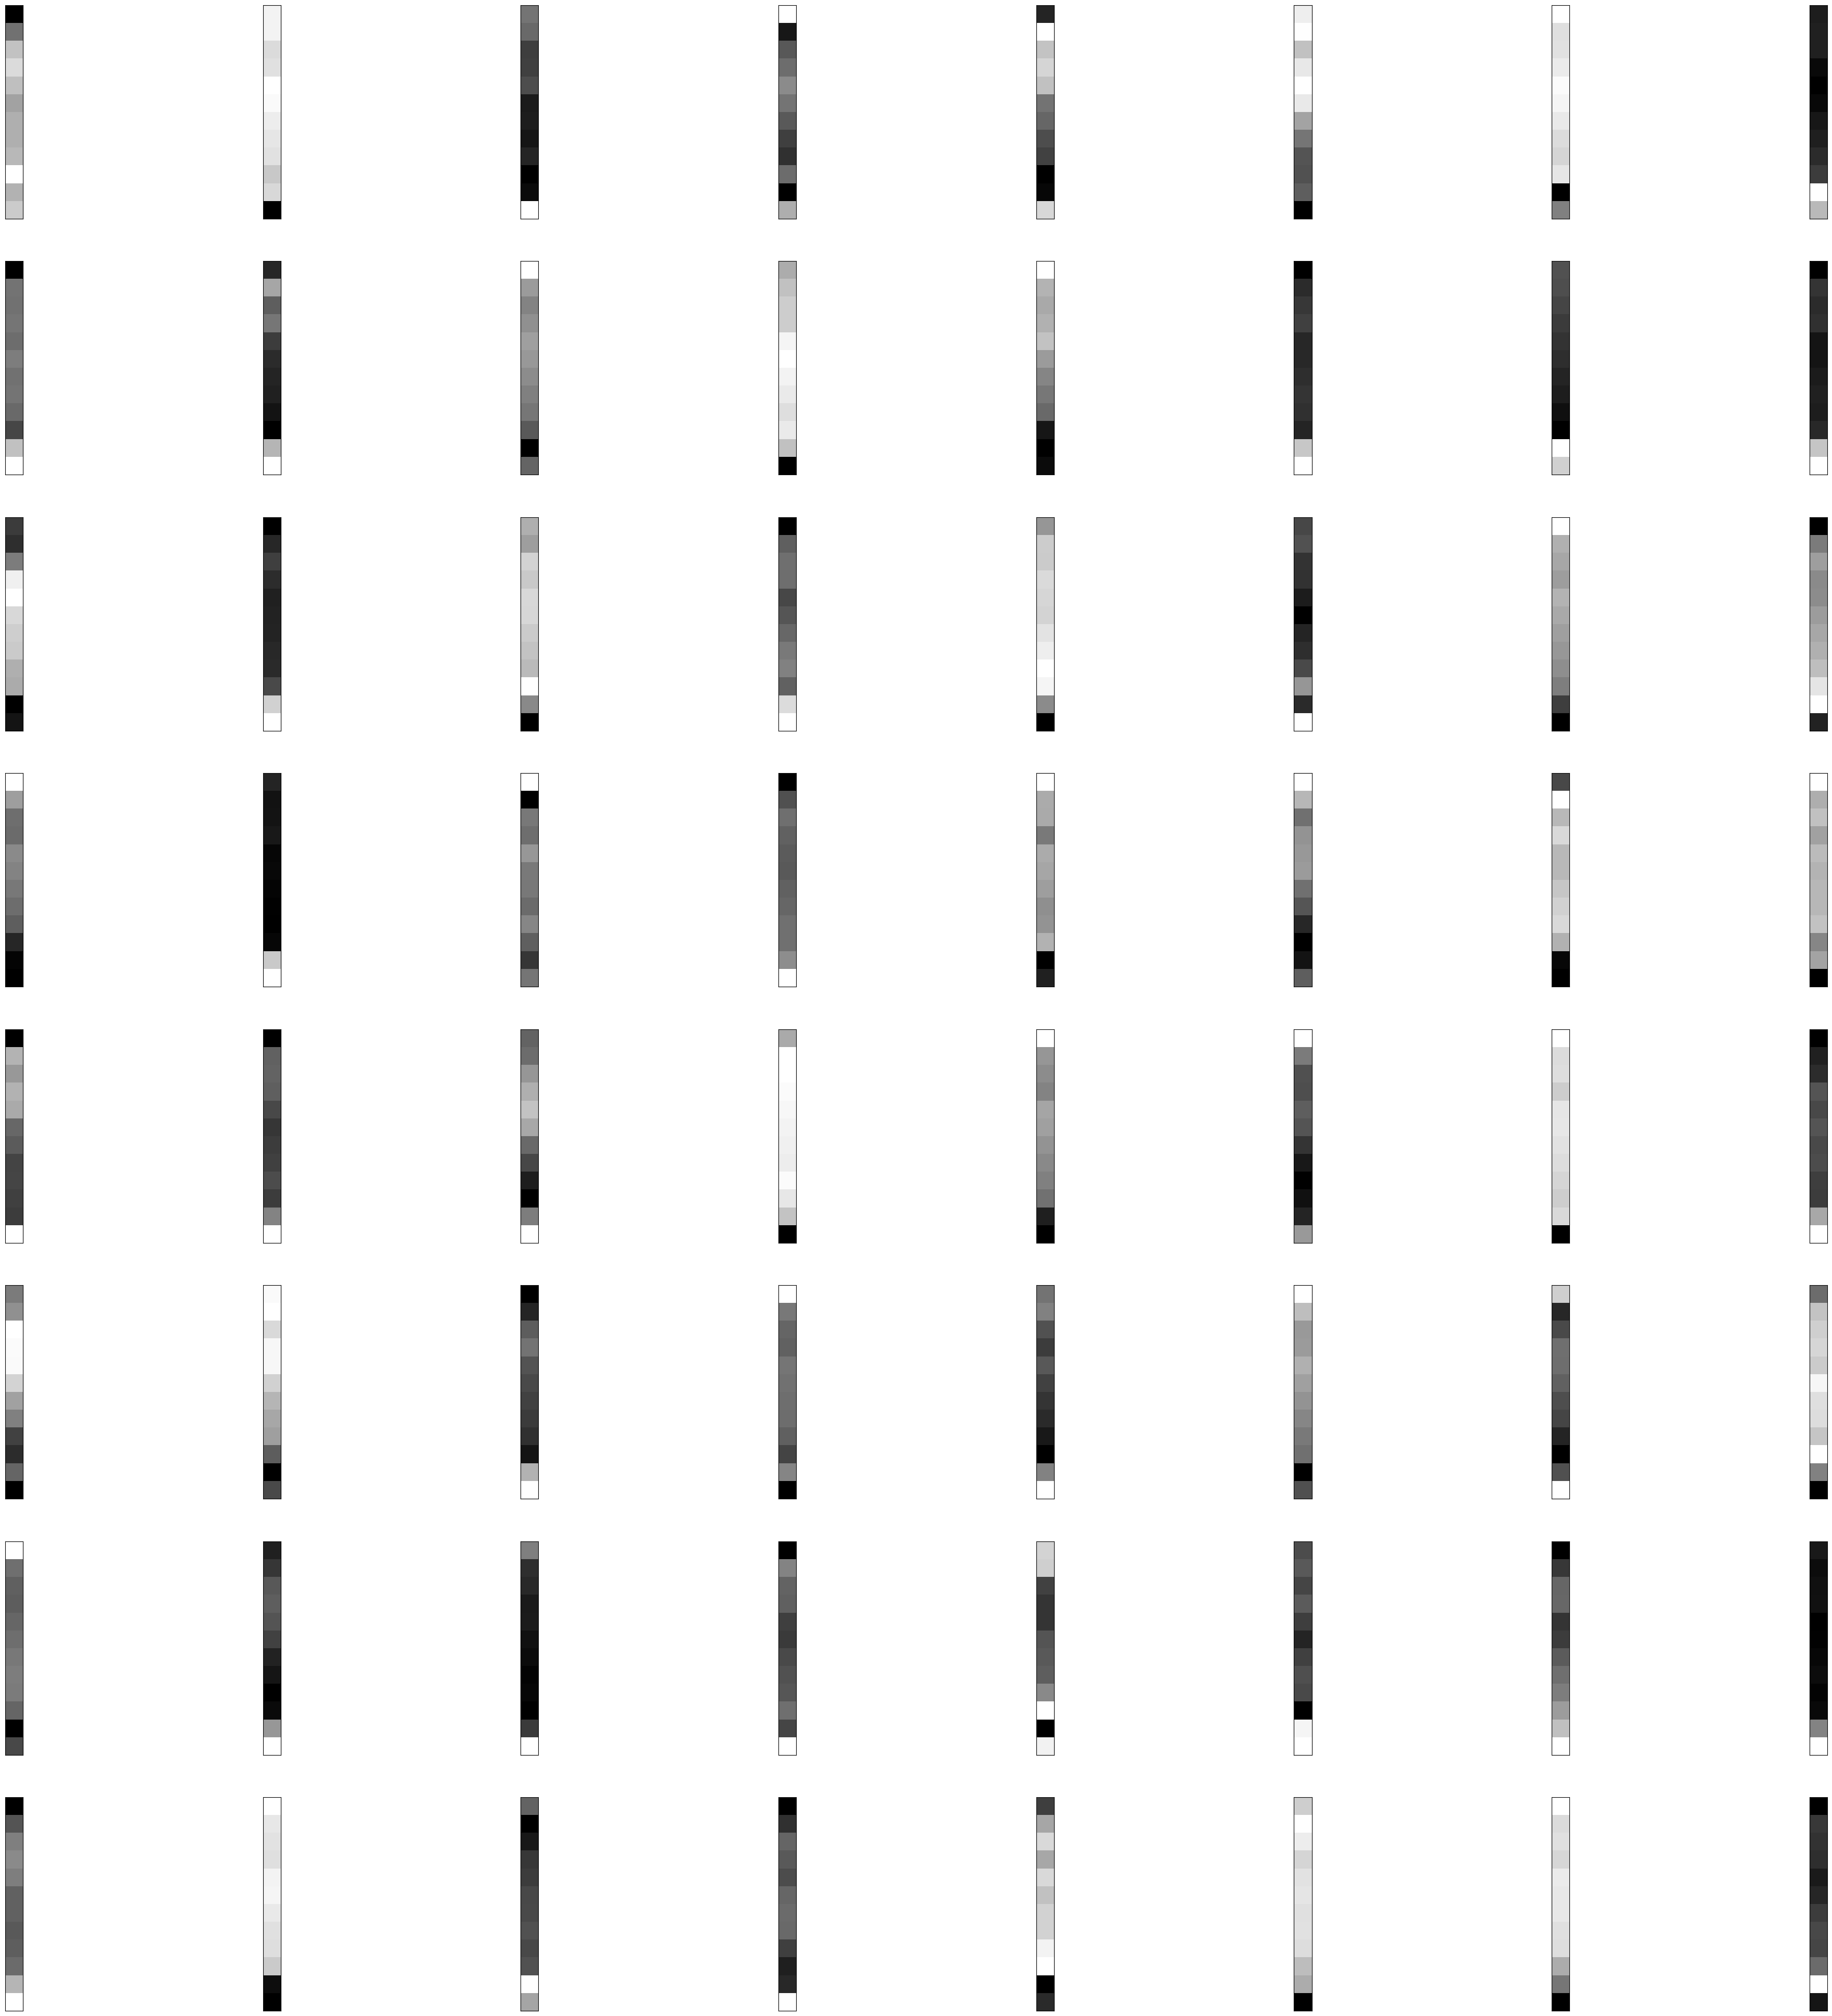

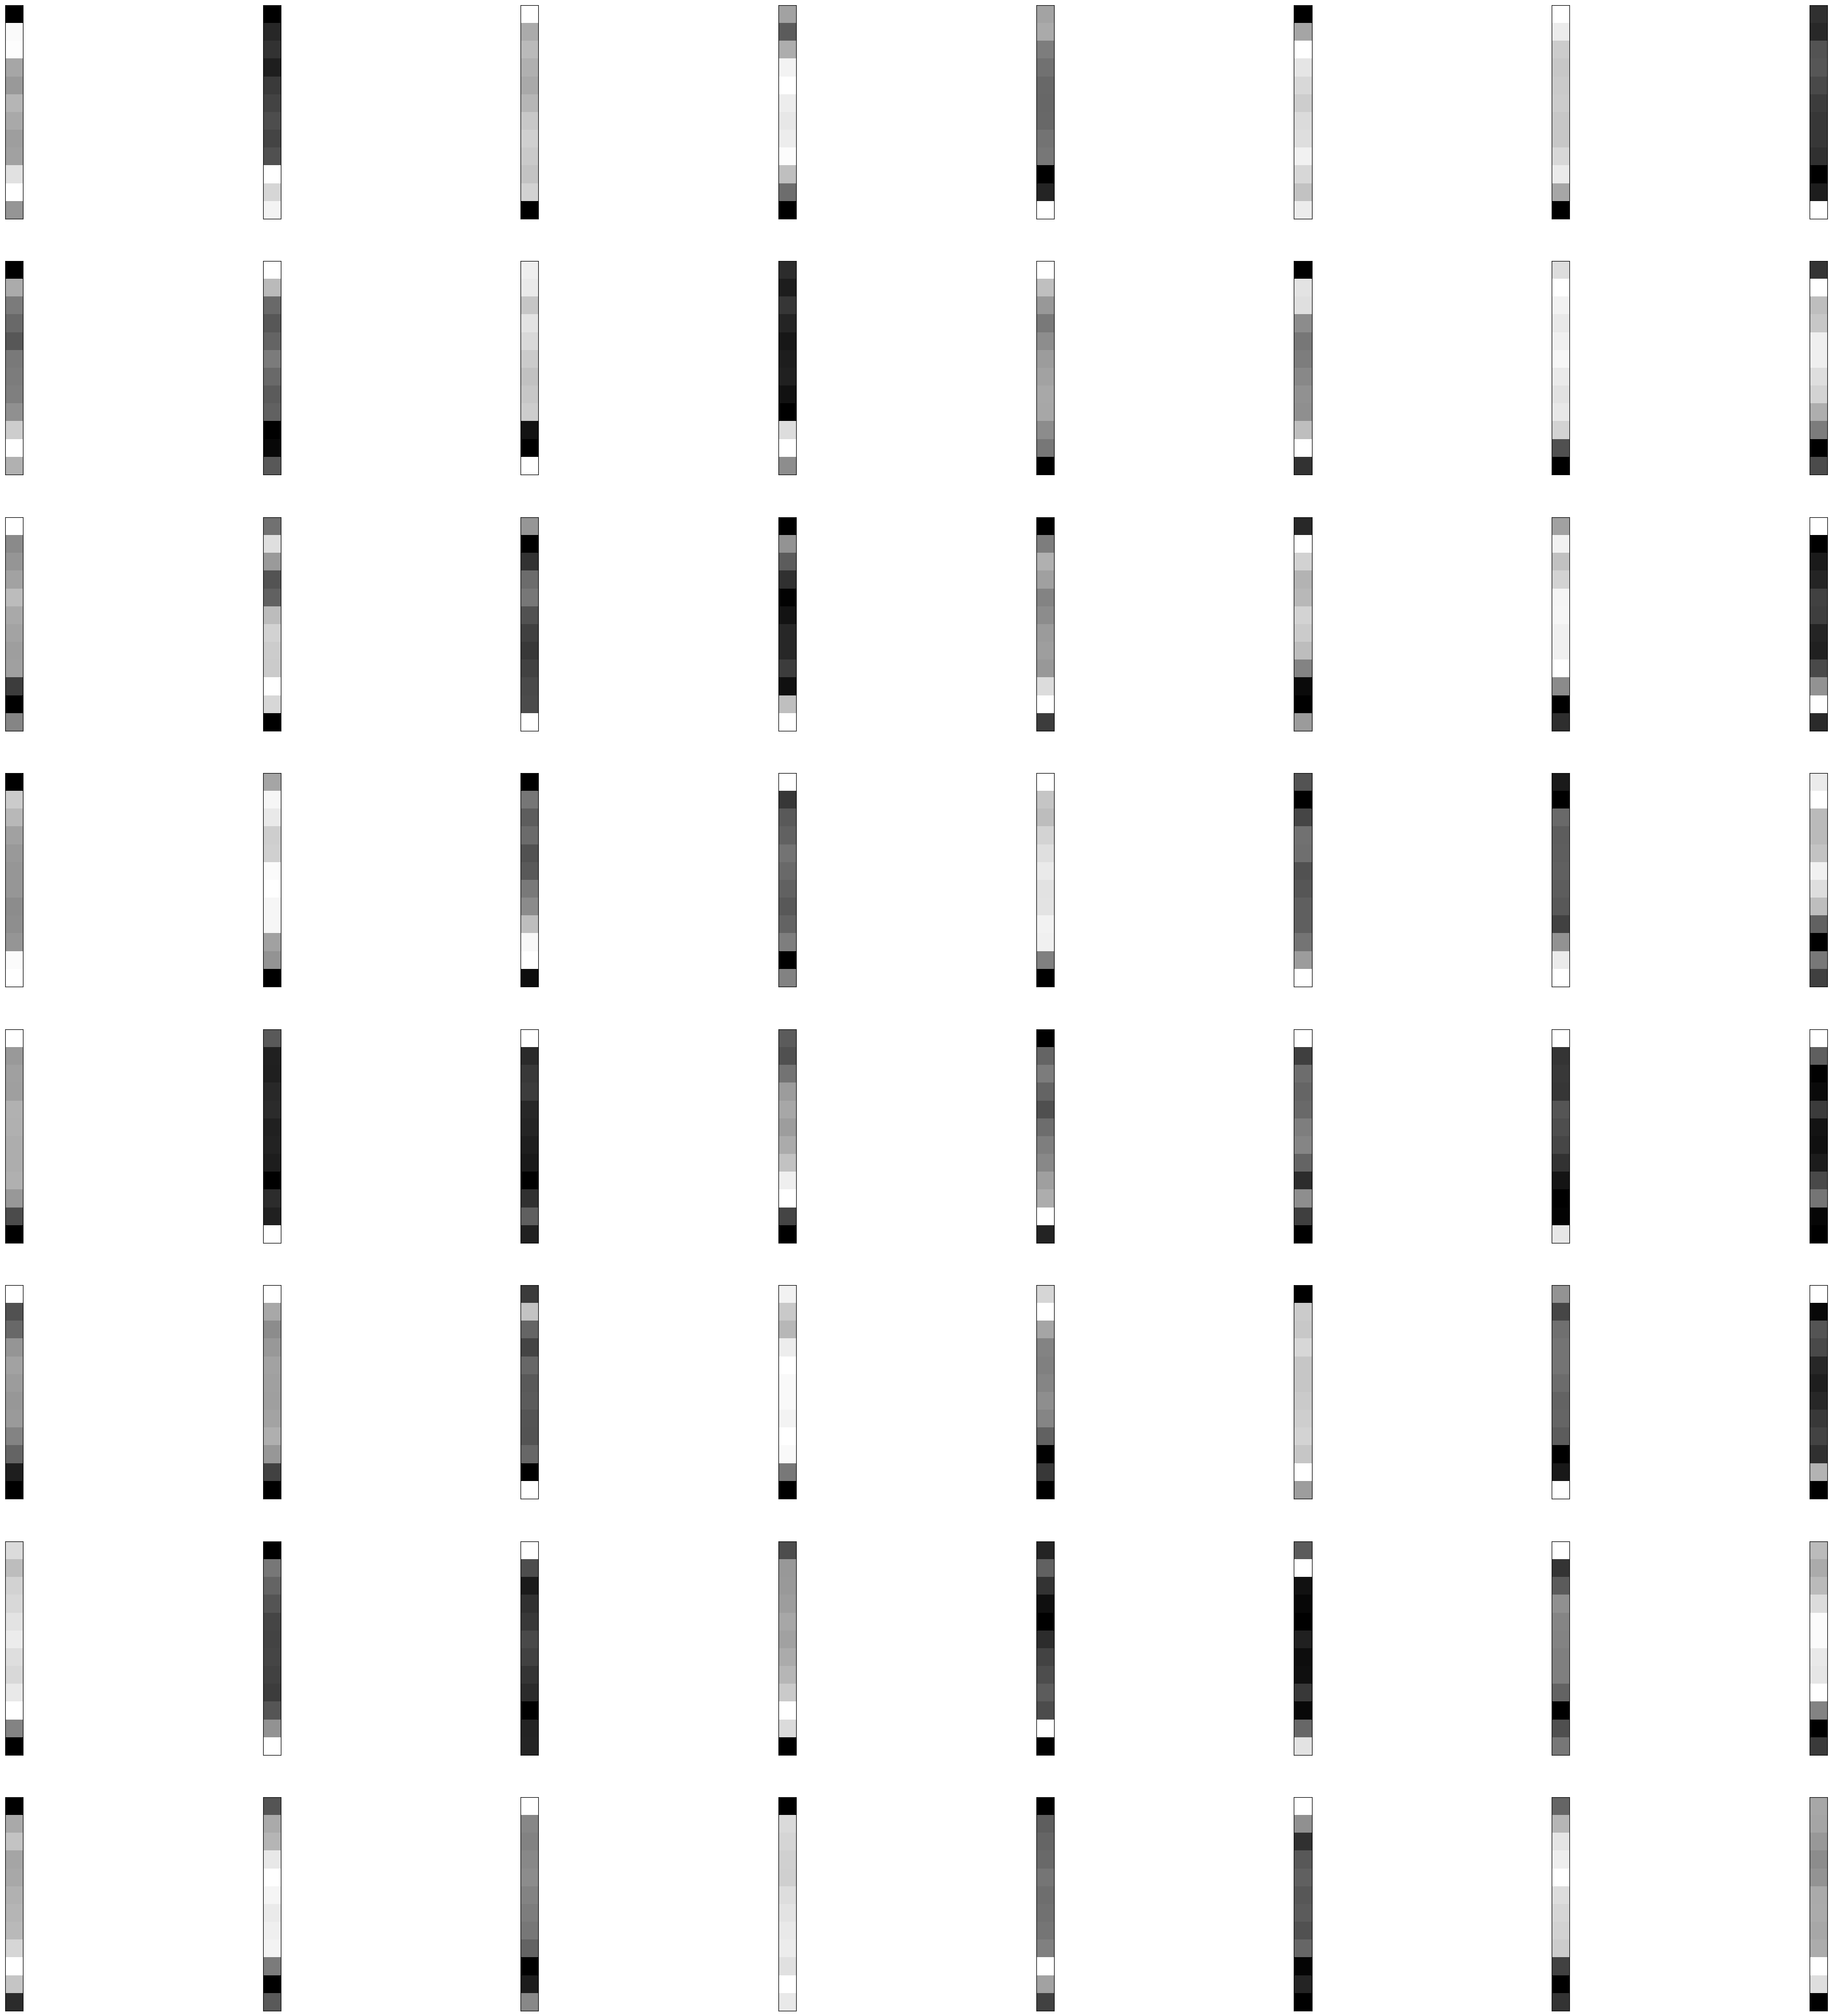

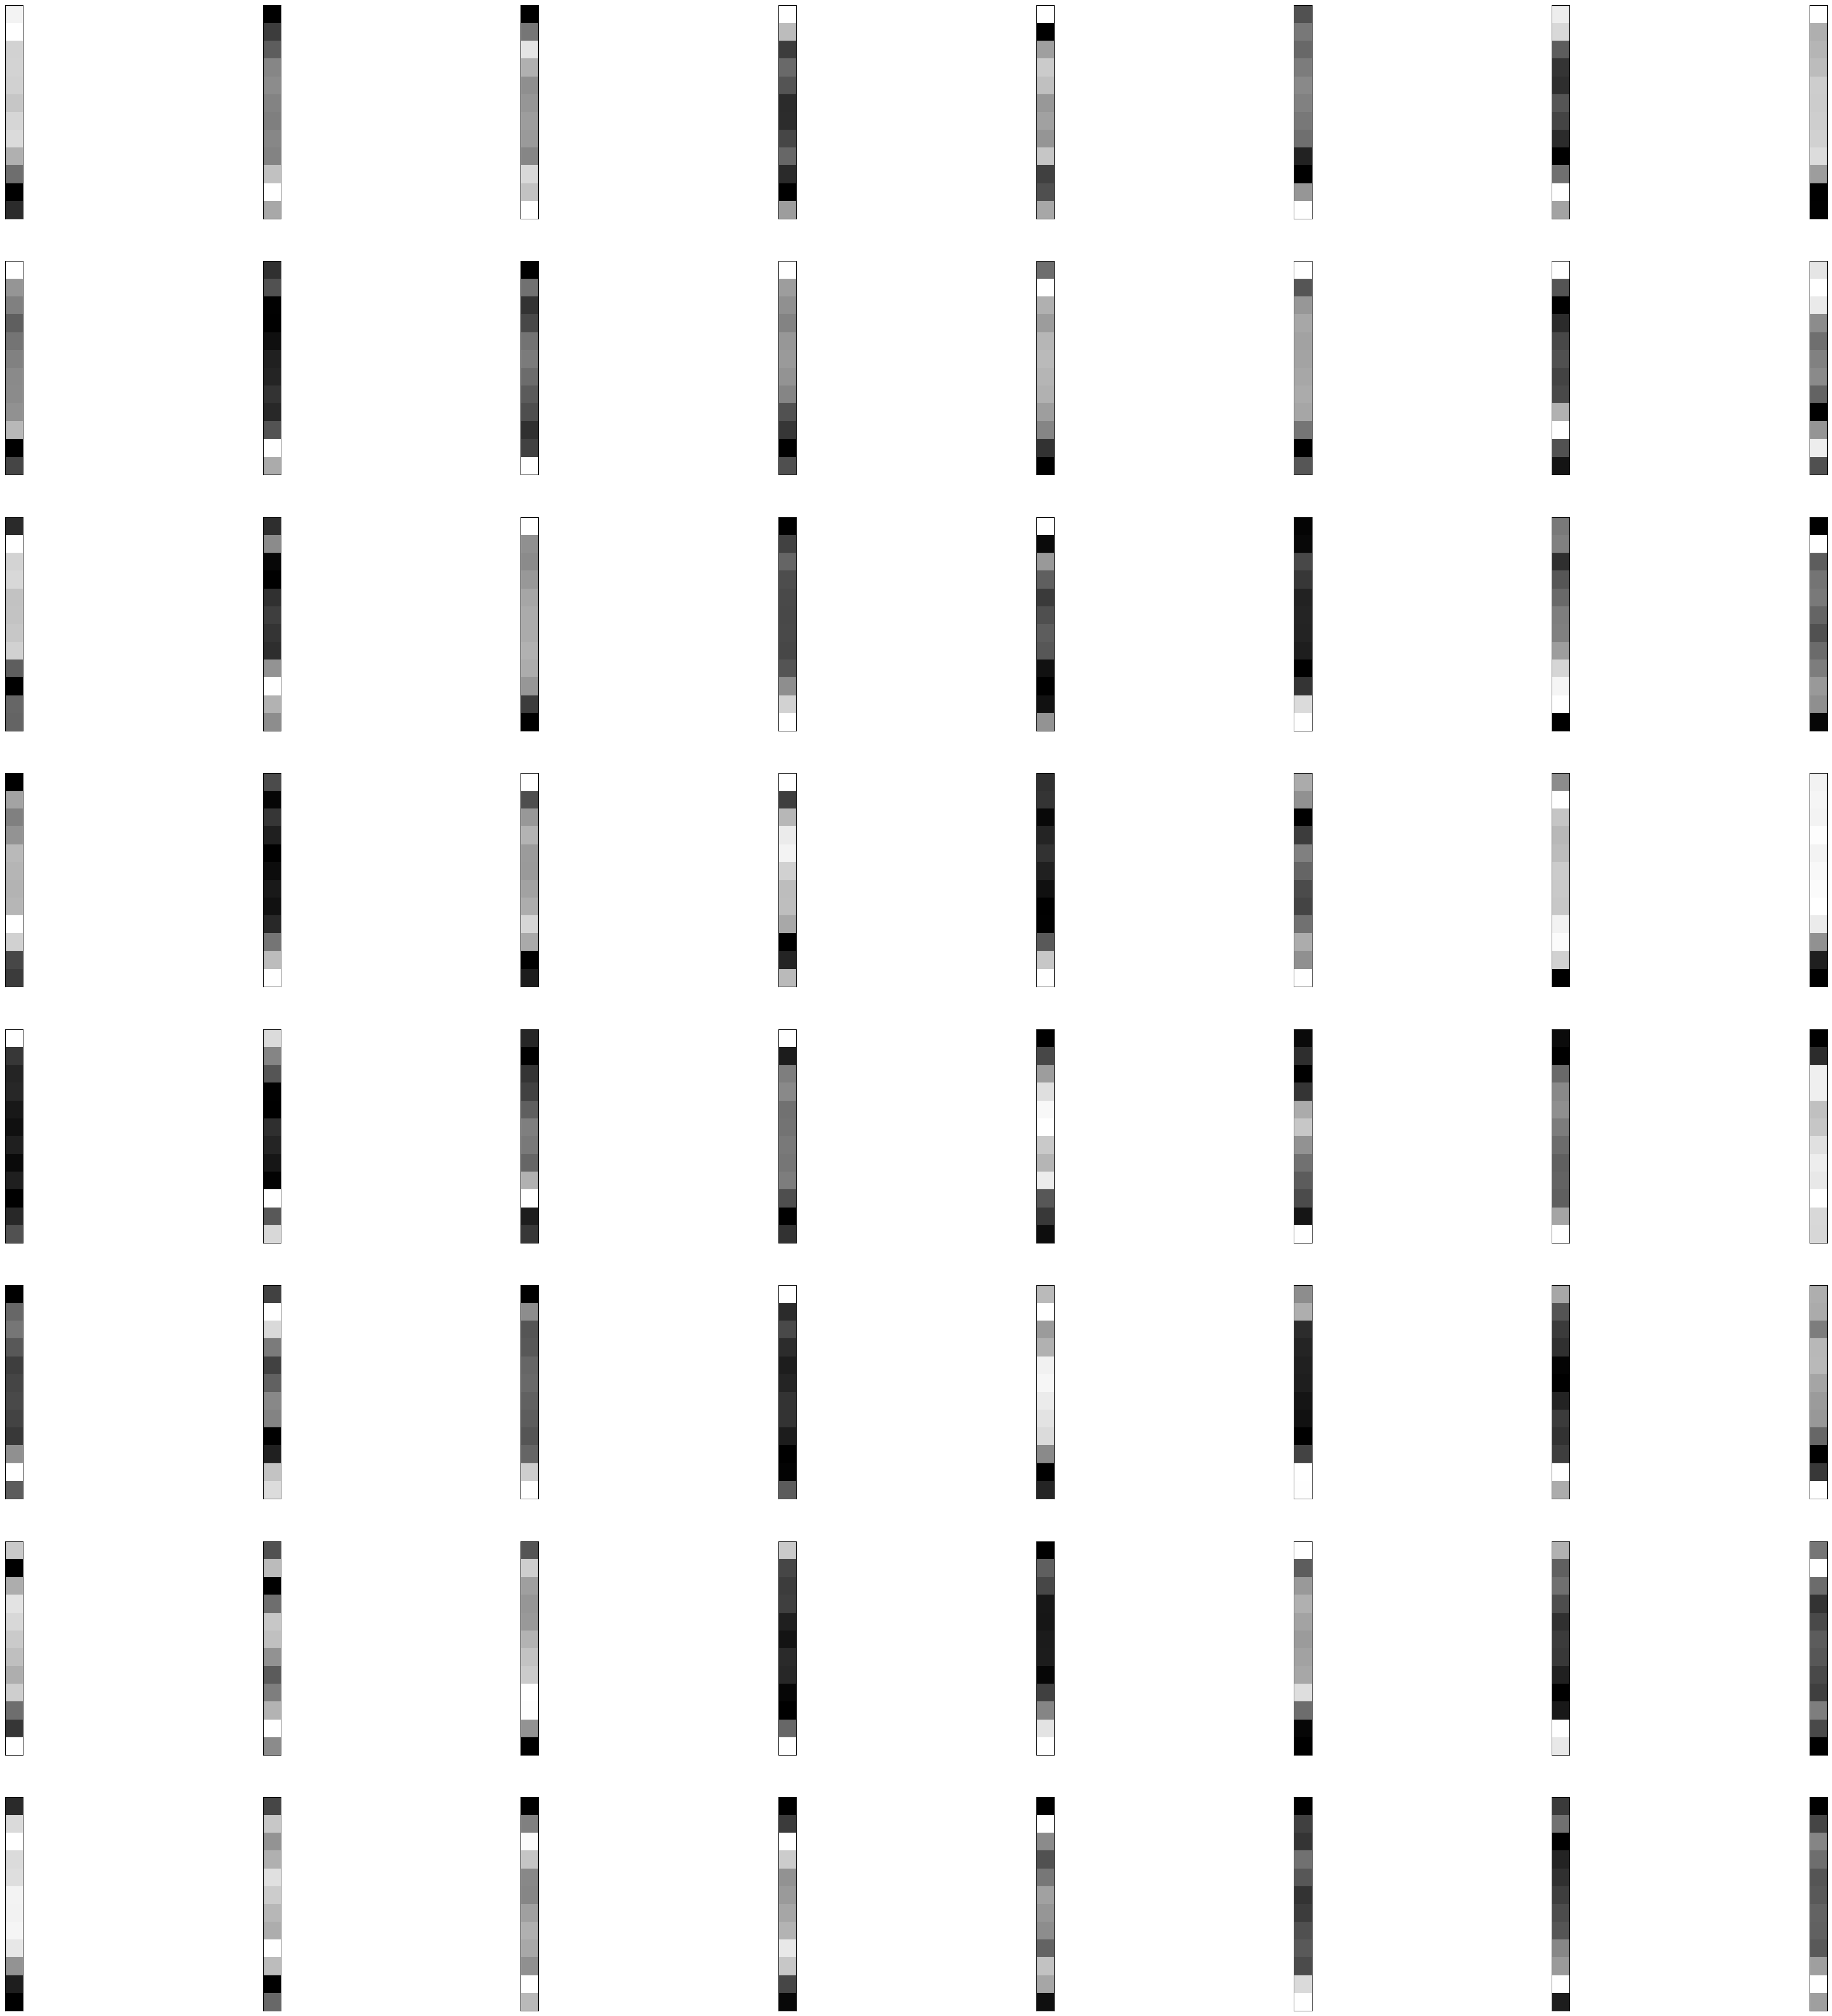

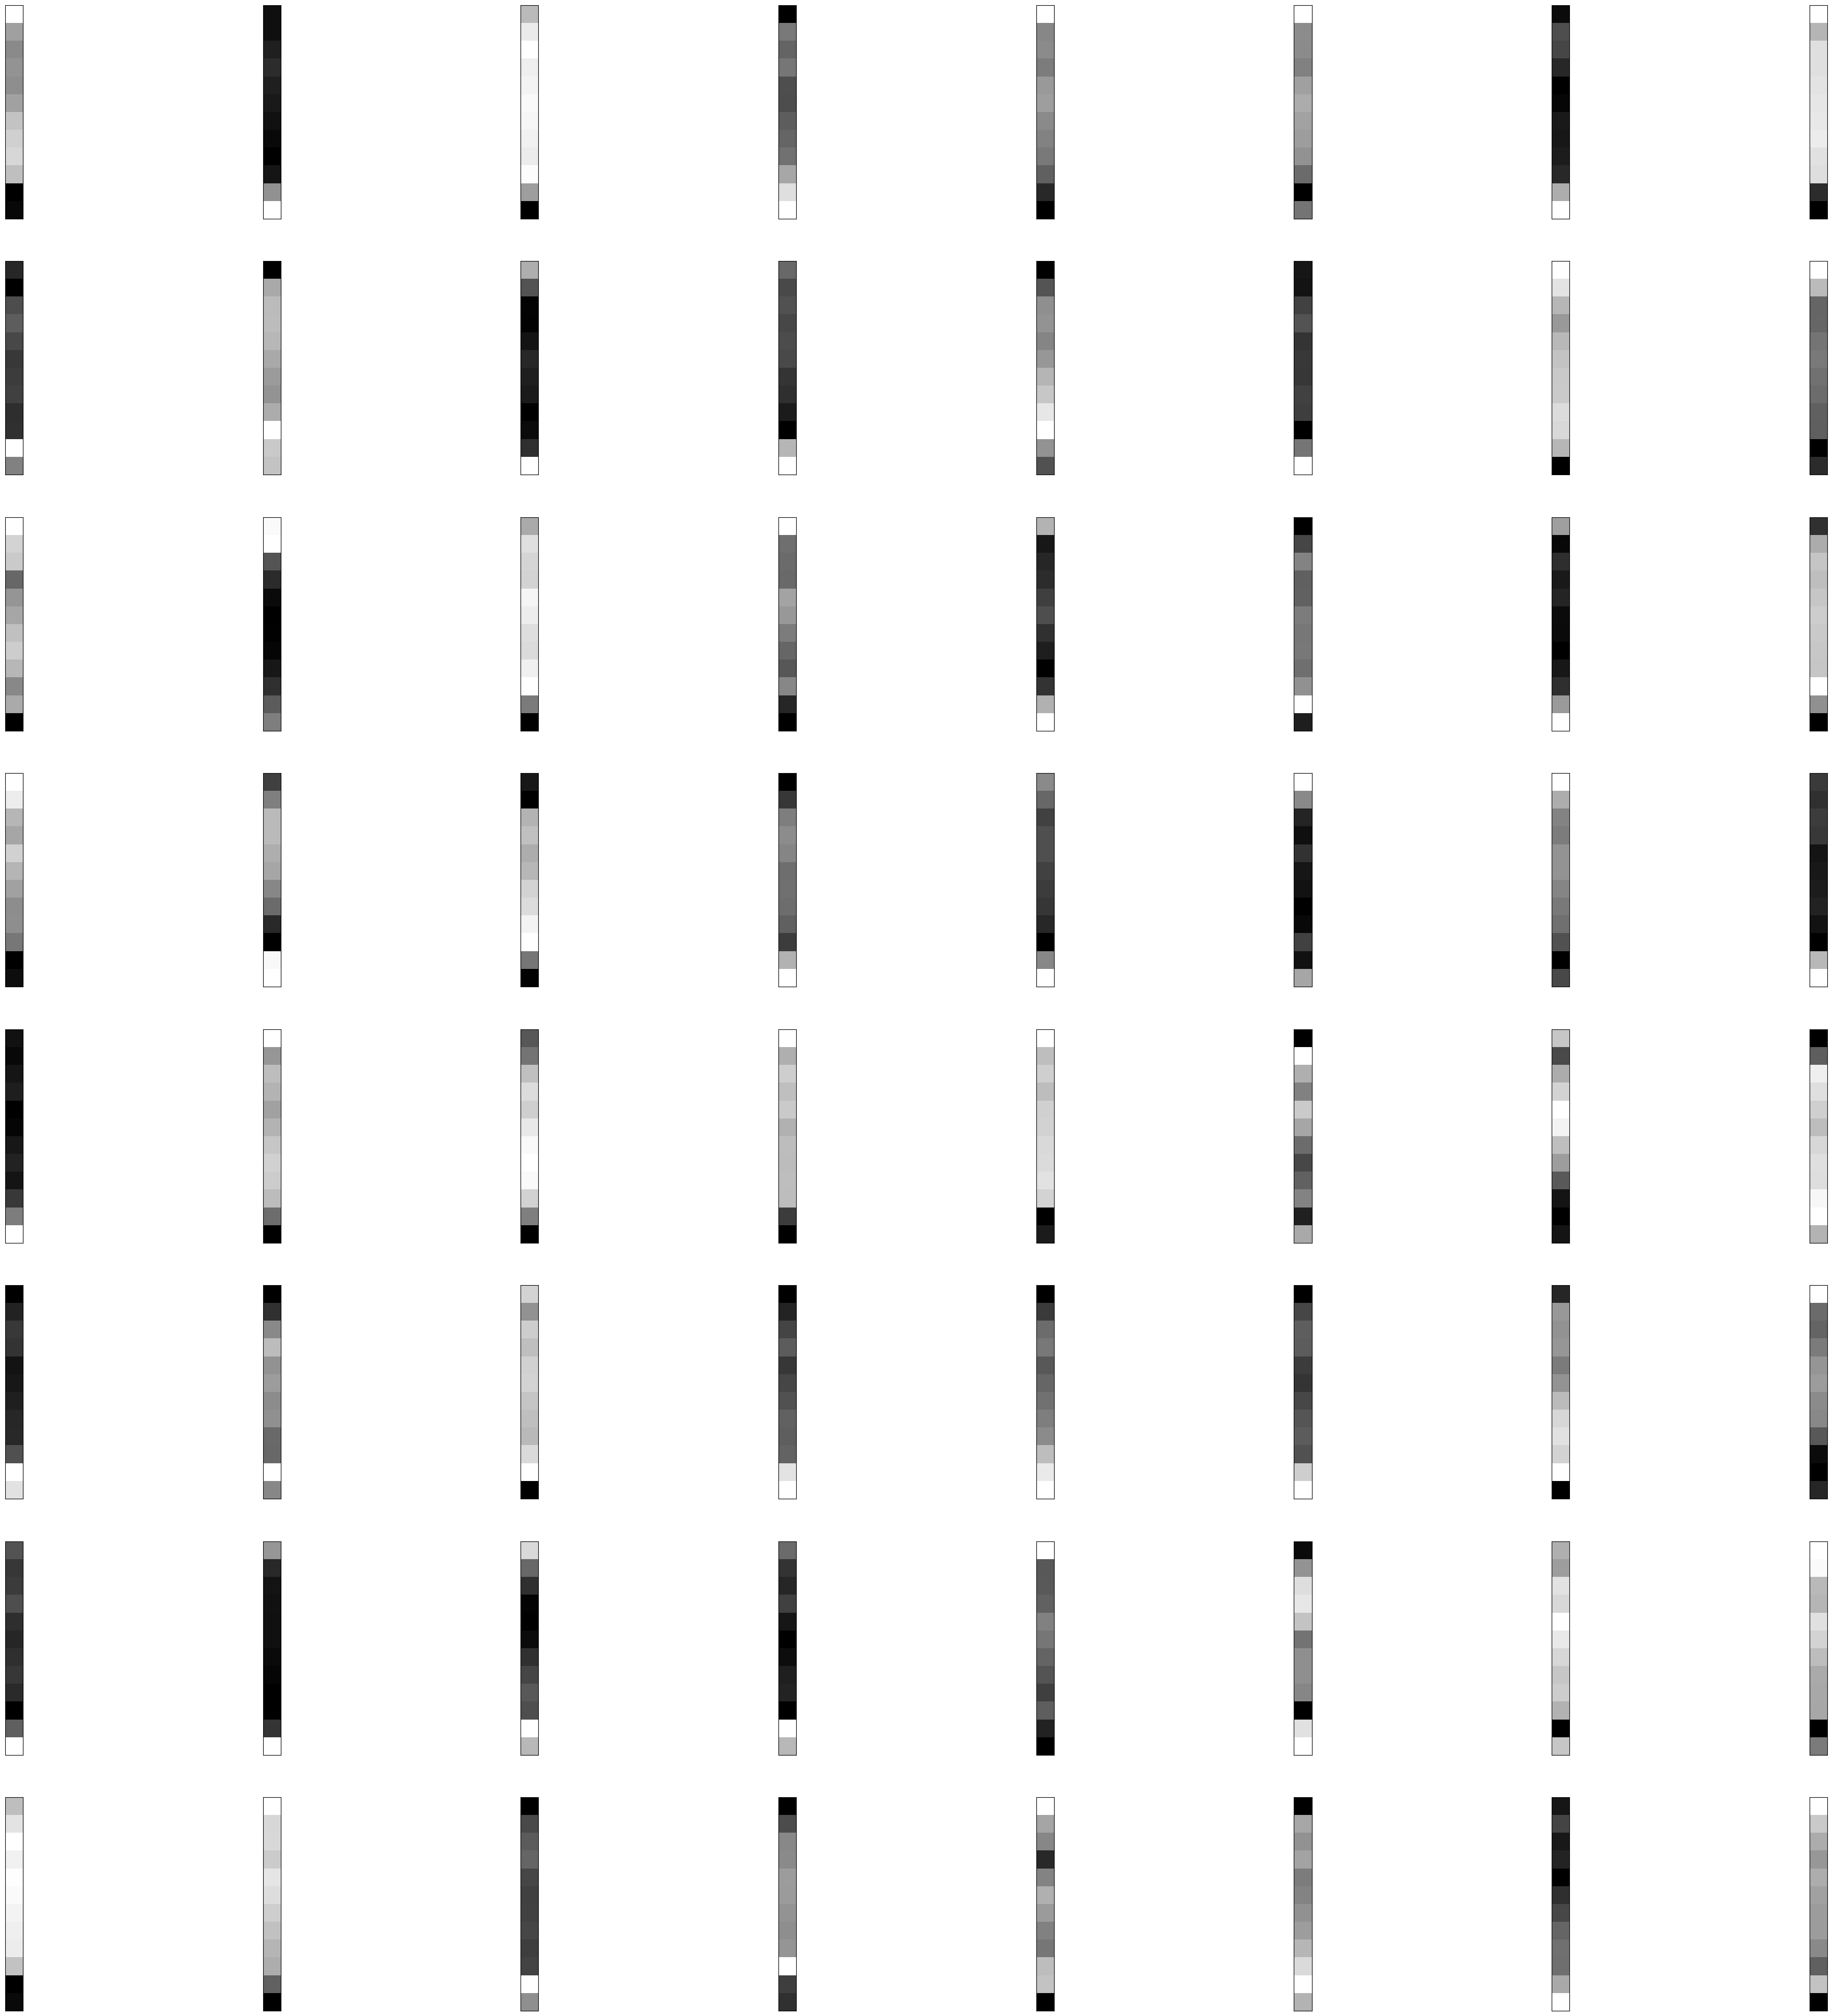

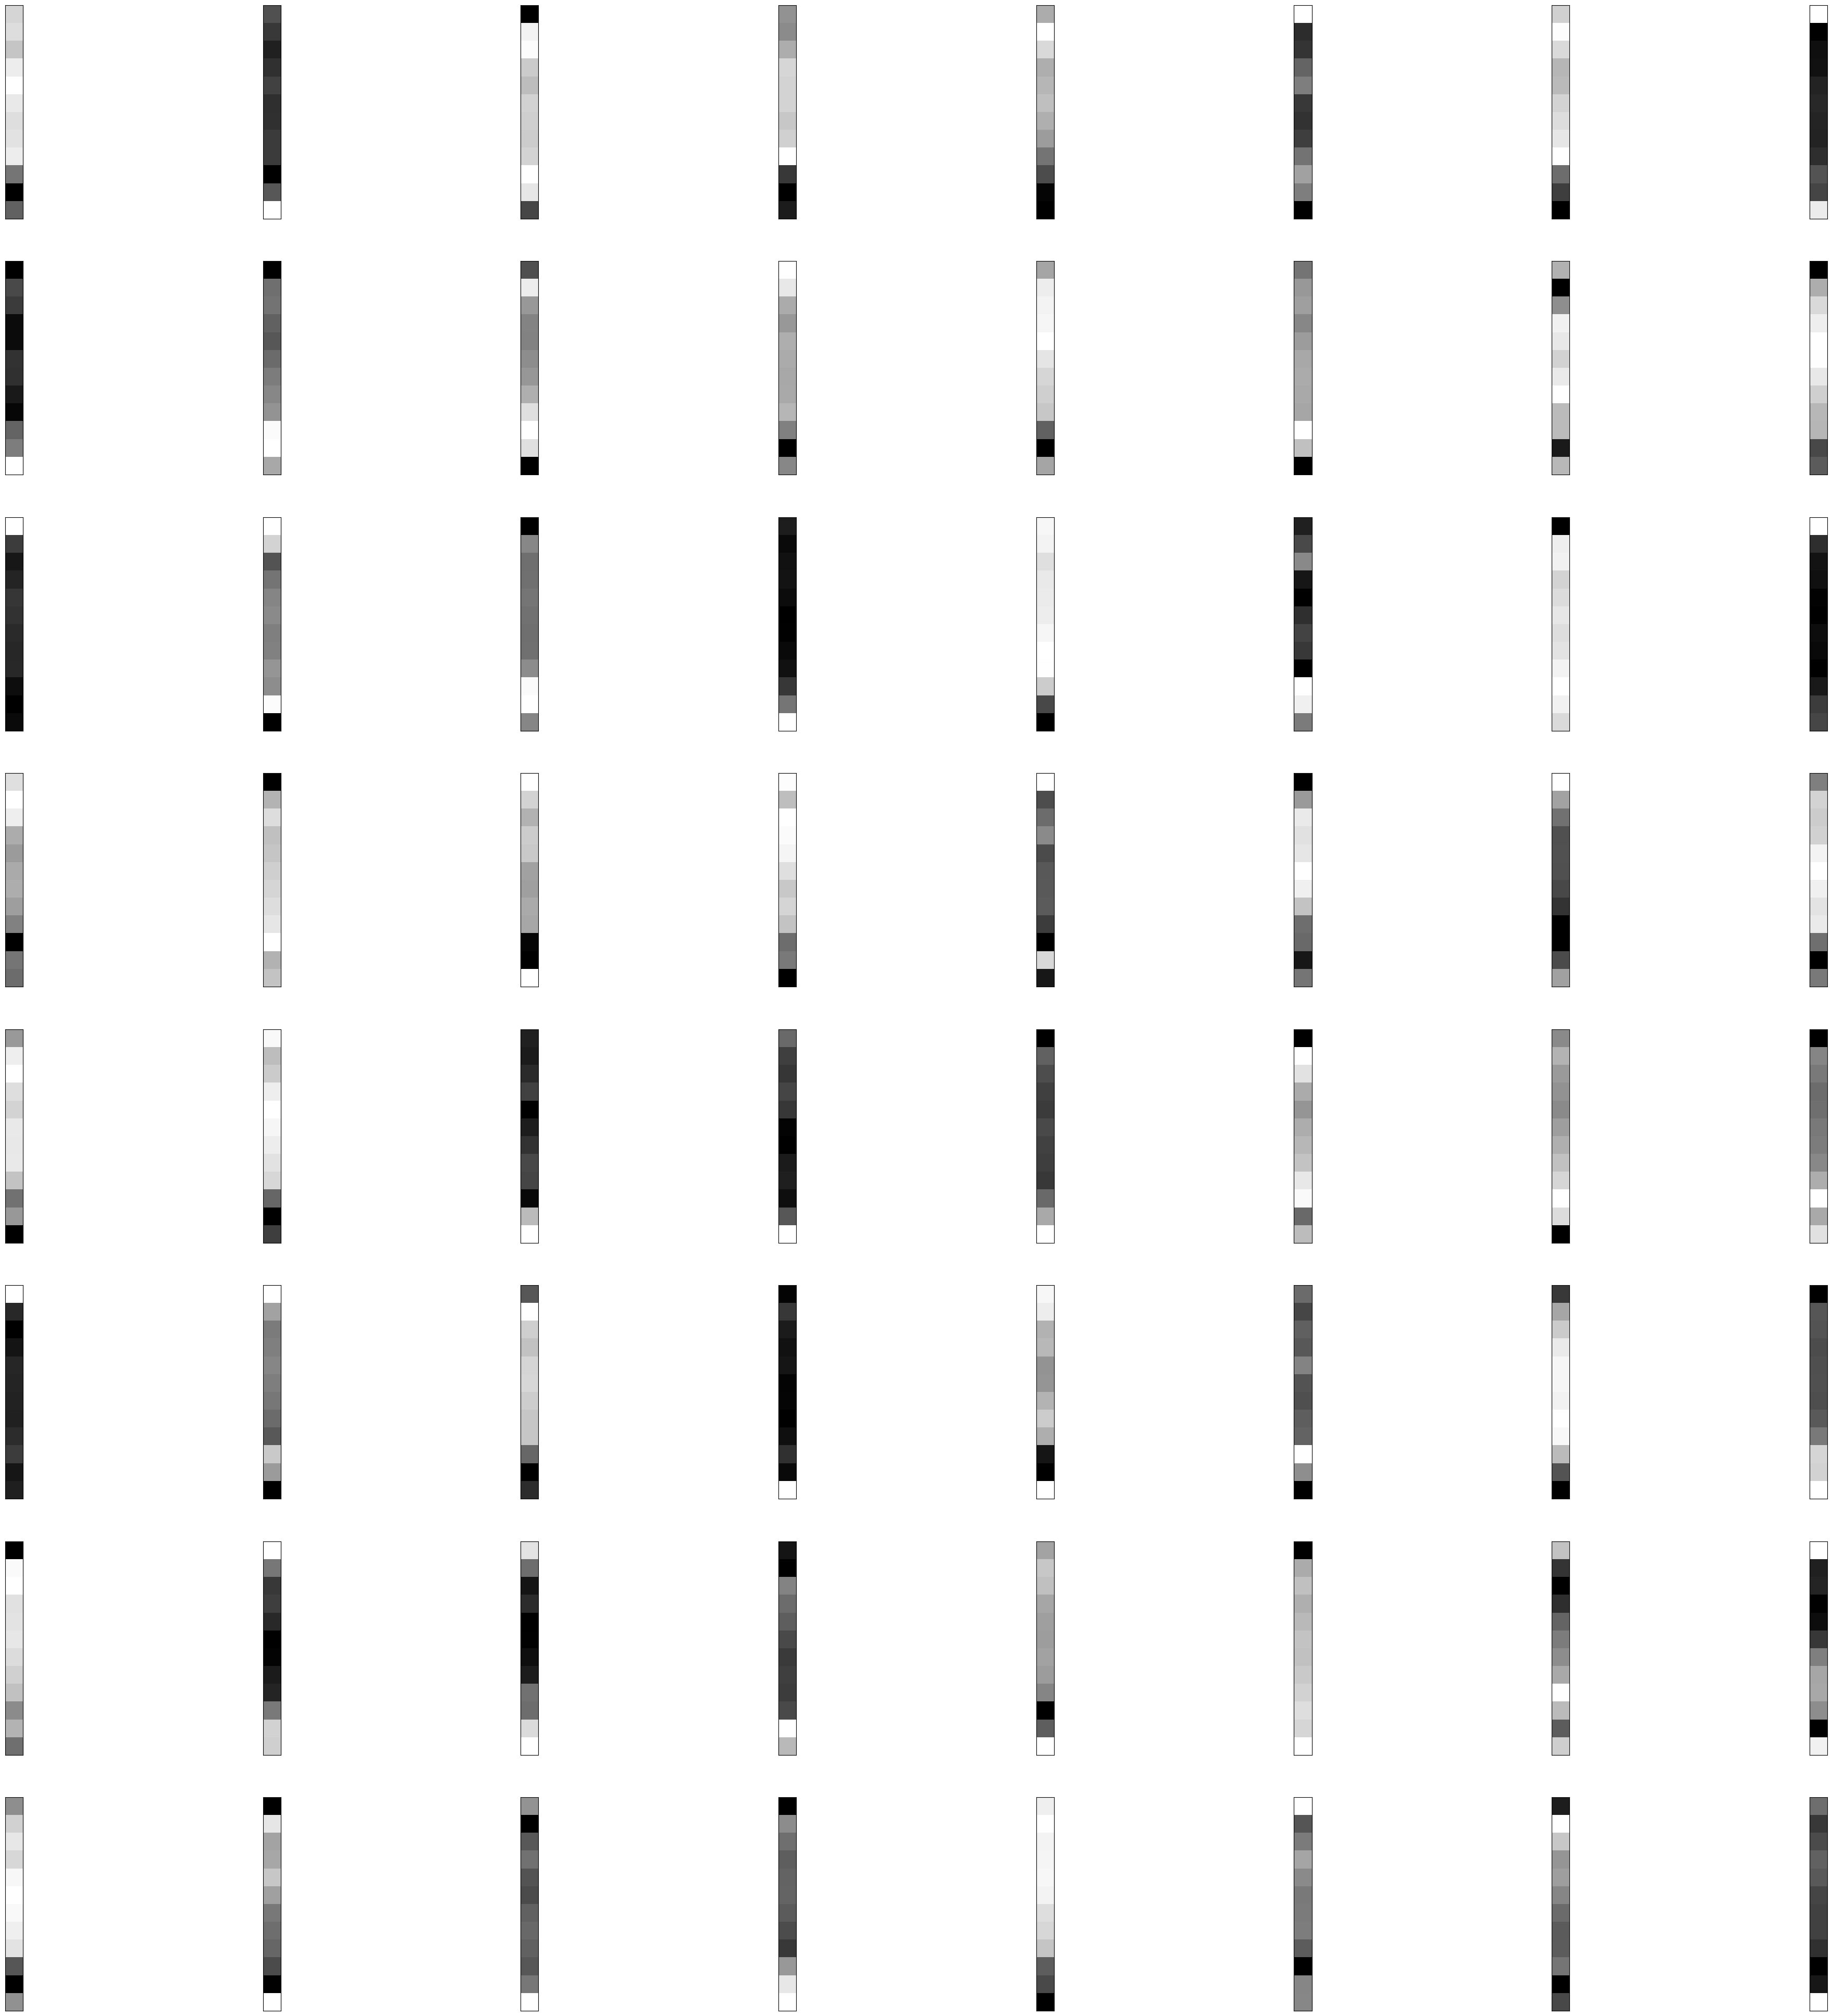

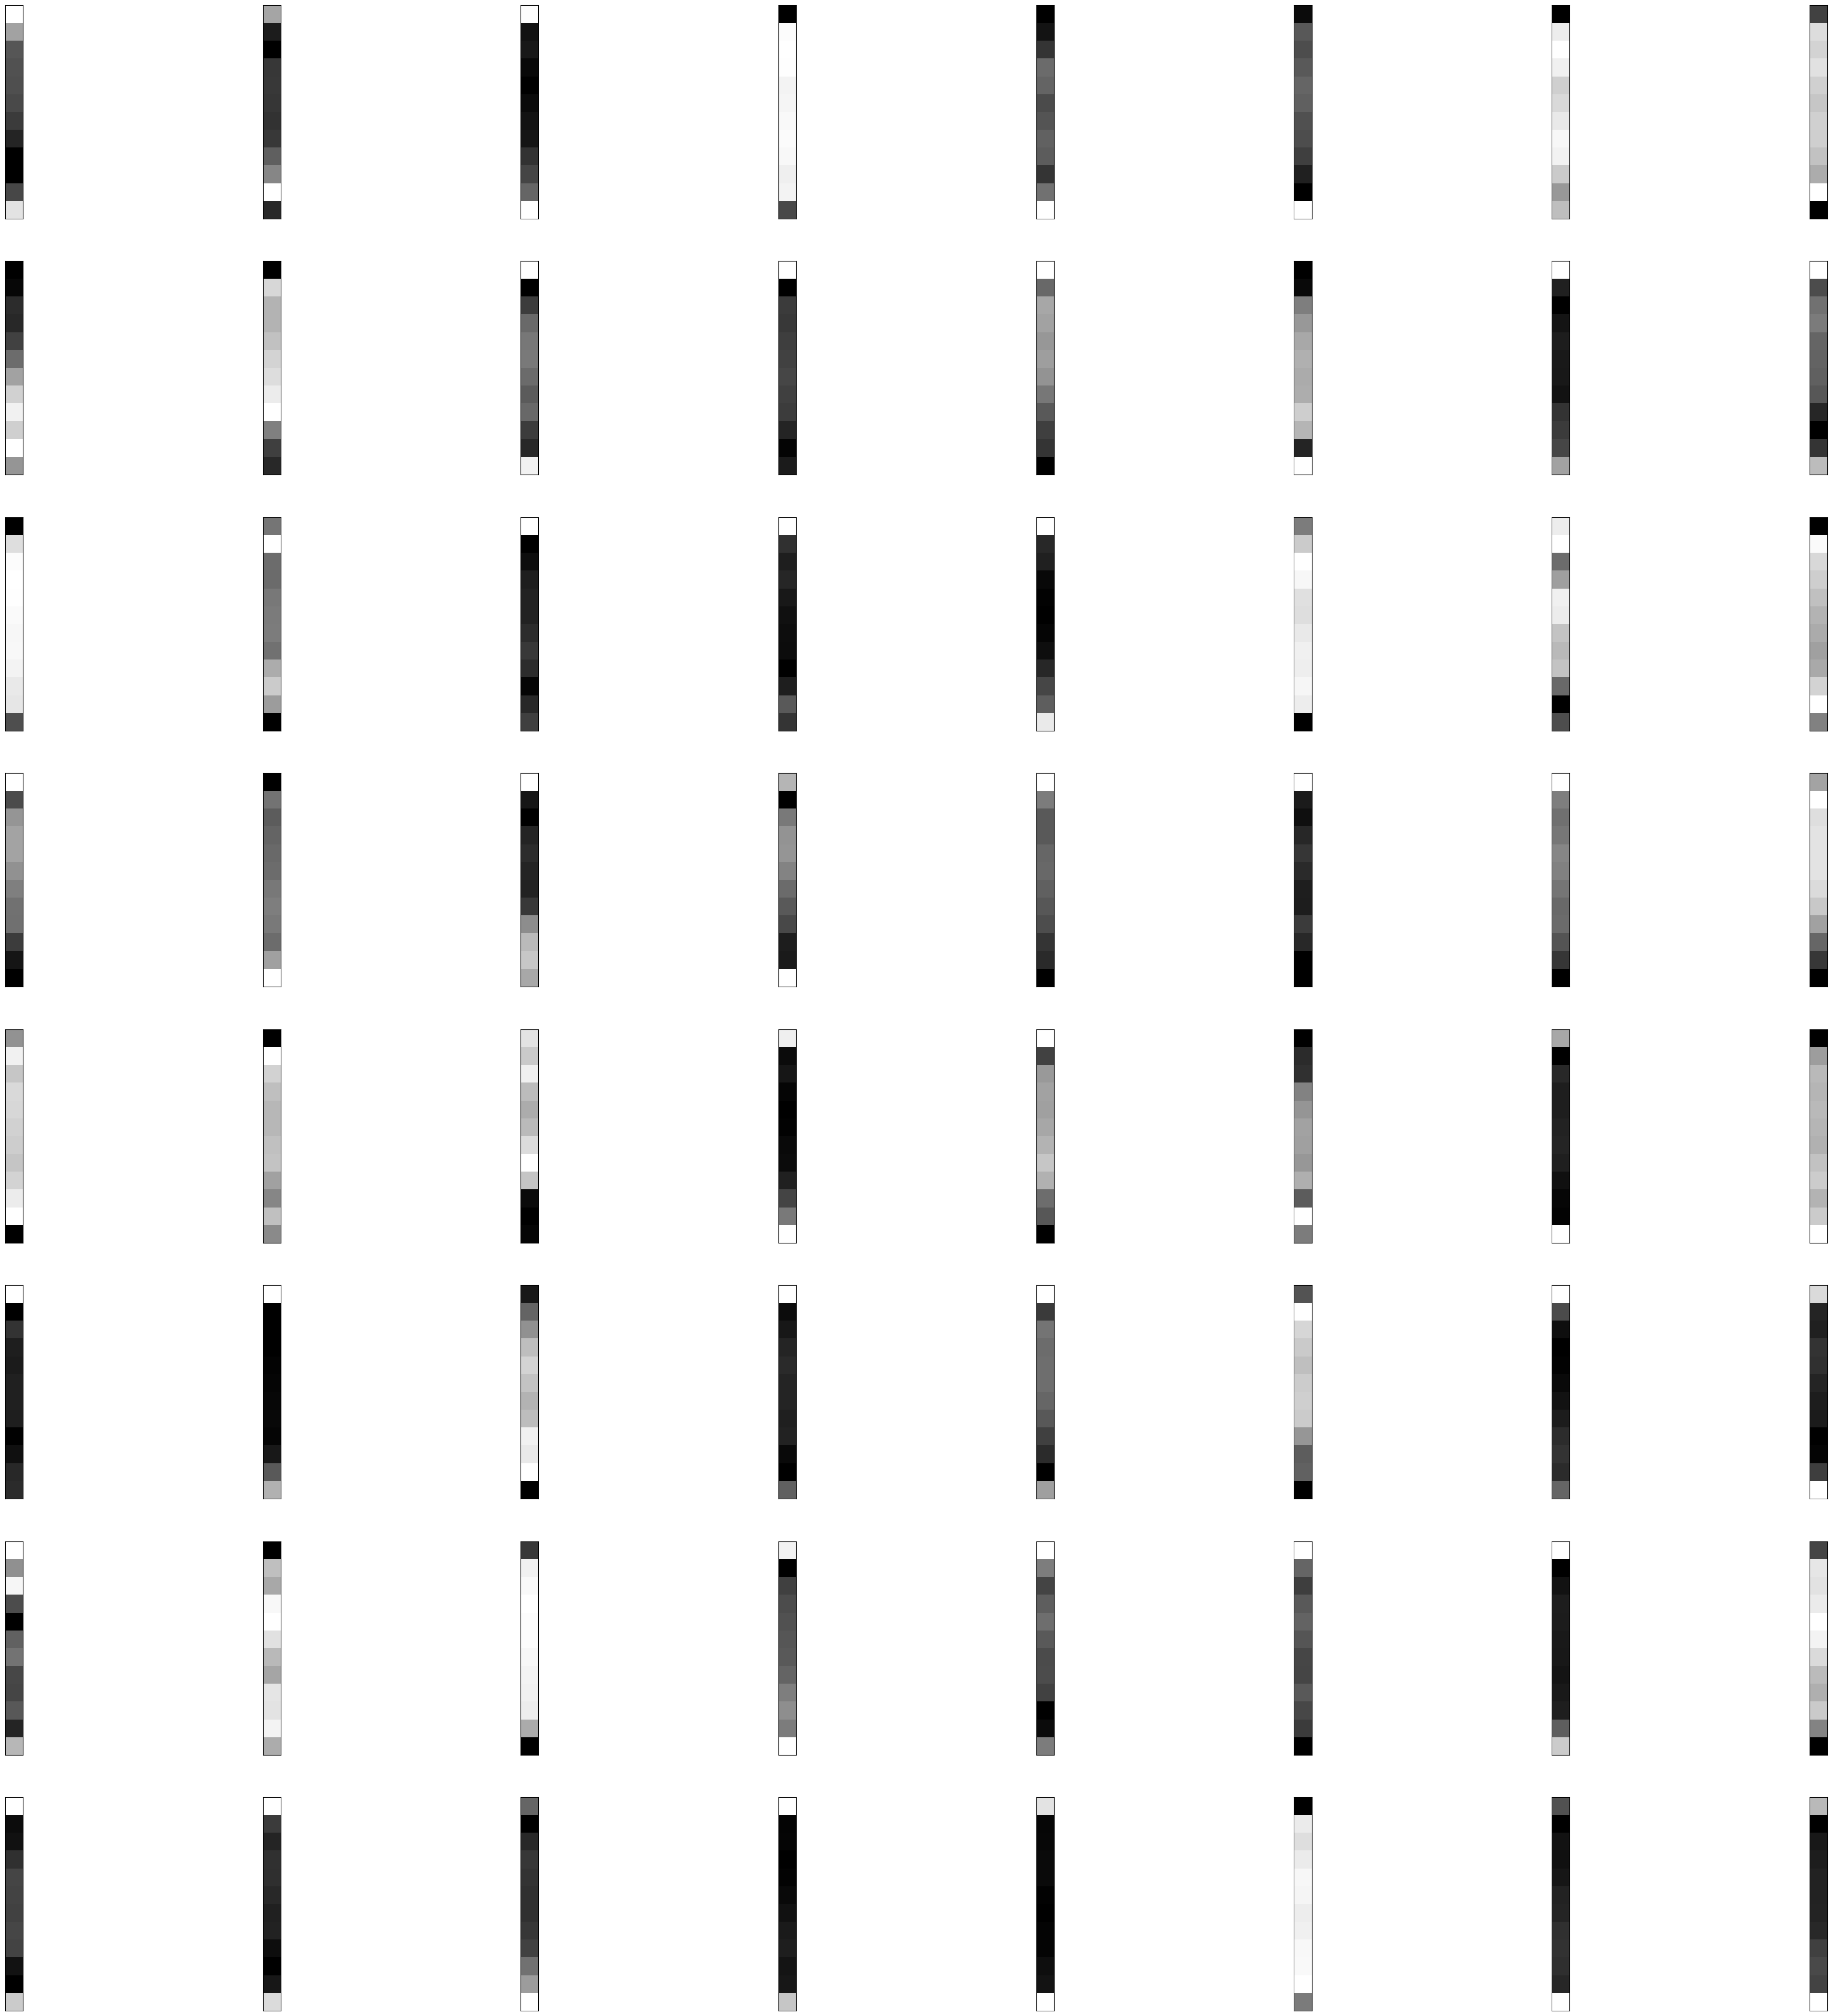

In [29]:
#from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from numpy import expand_dims
from matplotlib import pyplot
from keras.applications.vgg16 import preprocess_input

img = test_imgs[10]

# List to hold the outputs of the conv layers
outputs = []

# Iterate over the layers and store the output of the conv layers
for layer in model.layers:
    if 'conv' in layer.name:
        outputs.append(layer.output)

# redefine model to output right after the conv layers
model_output = Model(inputs=model.inputs, outputs=outputs)

# get feature map for the conv layers
feature_maps = model_output.predict(img)

# plot the output from each block
for fmap in feature_maps:
    # plot just the first 64 convolutions in 8x8 square
    square = 8
    ix = 1
    pyplot.figure(figsize=(50,50))
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            if ix > fmap.shape[-1]:
                break
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    pyplot.show()

2/2 [==============================] - 2s 105ms/step


<Figure size 1000x1000 with 0 Axes>

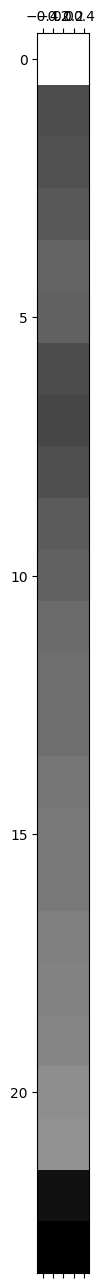

In [31]:
# get the convolutional layers
conv_layers = [layer for layer in model.layers if 'conv' in layer.name]

# create a new model that will output the activation maps
activation_model = Model(inputs=model.inputs, outputs=[layer.output for layer in conv_layers])

# use the activation model to get the activation maps
activations = activation_model.predict(img)

# plot the activation map of the first layer
first_layer_activation = activations[0]
plt.figure(figsize=(10,10))
plt.matshow(first_layer_activation[0, :, :, 0], cmap='gray')
plt.show()